In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [92]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Checking nulls

In [4]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## Checking data type

In [58]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## Handling null values

In [93]:
#for continuous feature
df['MinTemp']=df['MinTemp'].fillna(df.groupby('Location')['MinTemp'].transform('mean'))
df['MaxTemp']=df['MaxTemp'].fillna(df.groupby('Location')['MaxTemp'].transform('mean'))
df['Rainfall']=df['Rainfall'].fillna(df.groupby('Location')['Rainfall'].transform('mean'))
df['Evaporation']=df['Evaporation'].fillna(df.groupby('Location')['Evaporation'].transform('mean'))
df['Sunshine']=df['Sunshine'].fillna(df.groupby('Location')['Sunshine'].transform('mean'))
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df.groupby('Location')['WindGustSpeed'].transform('mean'))
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df.groupby('Location')['WindSpeed9am'].transform('mean'))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df.groupby('Location')['WindSpeed3pm'].transform('mean'))
df['Humidity9am']=df['Humidity9am'].fillna(df.groupby('Location')['Humidity9am'].transform('mean'))
df['Humidity3pm']=df['Humidity3pm'].fillna(df.groupby('Location')['Humidity3pm'].transform('mean'))
df['Pressure9am']=df['Pressure9am'].fillna(df.groupby('Location')['Pressure9am'].transform('mean'))
df['Pressure3pm']=df['Pressure3pm'].fillna(df.groupby('Location')['Pressure3pm'].transform('mean'))
df['Cloud9am']=df['Cloud9am'].fillna(df.groupby('Location')['Cloud9am'].transform('mean'))
df['Cloud3pm']=df['Cloud3pm'].fillna(df.groupby('Location')['Cloud3pm'].transform('mean'))
df['Temp9am']=df['Temp9am'].fillna(df.groupby('Location')['Temp9am'].transform('mean'))
df['Temp3pm']=df['Temp3pm'].fillna(df.groupby('Location')['Temp3pm'].transform('mean'))

In [94]:
#for categorical feature
df['WindGustDir']=df['WindGustDir'].fillna(df.groupby('Location')['WindGustDir'].agg(pd.Series.mode)[0])
df['WindDir9am']=df['WindDir9am'].fillna(df.groupby('Location')['WindDir9am'].agg(pd.Series.mode)[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df.groupby('Location')['WindDir3pm'].agg(pd.Series.mode)[0])
df['RainToday']=df['RainToday'].fillna(df.groupby('Location')['RainToday'].agg(pd.Series.mode)[0])

In [51]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      2724
Sunshine         2929
WindGustDir         0
WindGustSpeed     822
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1304
Pressure3pm      1304
Cloud9am          687
Cloud3pm          687
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow      239
dtype: int64

Still we could see some null values so again we need to treat it.

In [95]:
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [53]:
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     239
dtype: int64

## Handling null values in label variable i.e. RainTomorrow

We would drop those rows in label having null values so that it doesnot impact the prediction made by our model.

In [87]:
#Finding data loss
no_row_dropped=239
loss=(8425-239)/8425
loss=(1-loss)*100
print("data loss-",loss)

data loss- 2.8367952522255213


we can bear with 3% data loss so we would delete these rows.

In [96]:
i=df[df['RainTomorrow'].isnull()].index.tolist()
print(i)

[14, 283, 435, 437, 443, 452, 455, 464, 611, 928, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 2068, 2163, 2164, 2165, 2166, 2198, 2199, 2459, 2505, 2678, 2824, 2825, 2838, 2839, 2845, 2846, 2847, 2971, 2972, 2973, 3006, 3007, 3210, 3211, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3252, 3253, 3254, 3256, 3257, 3258, 3437, 3438, 3613, 3676, 3677, 3690, 3691, 3697, 3698, 3699, 3823, 3824, 3825, 3858, 3859, 4062, 4063, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4104, 4105, 4106, 4108, 4109, 4110, 4289, 4290, 4465, 5007, 5008, 5014, 5015, 5021, 5022, 5026, 5027, 5096, 5097, 5101, 5103, 5104, 5105, 5110, 5111, 5131, 5132, 5133, 5145, 5146, 5149, 5159, 5160, 5166, 5167, 5180, 5181, 5215, 5216, 5222, 5223, 5229, 5230, 5236, 5237, 5243, 5244, 5246, 5250, 5251, 5257, 5258, 5264, 5265, 5268, 5271, 5272, 5285, 5286, 5299, 5300, 5301, 5302, 5314, 5320, 5321, 5333, 5334, 53

In [97]:
df=df.drop(df.index[i])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.871464,7.775937,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.871464,7.775937,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.871464,7.775937,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.871464,7.775937,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.871464,7.775937,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,5.871464,7.775937,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,6.000000,5.285714,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,5.871464,7.775937,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,5.871464,7.775937,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.871464,7.775937,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,No,No


## Analysing relation between features

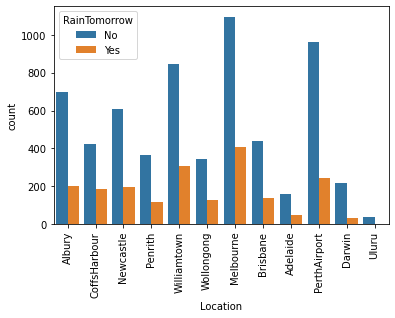

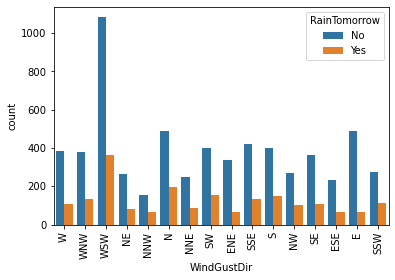

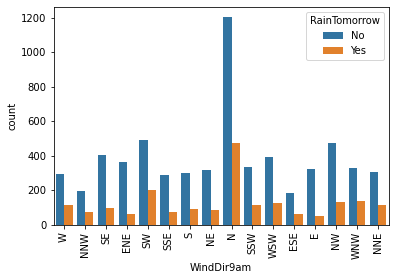

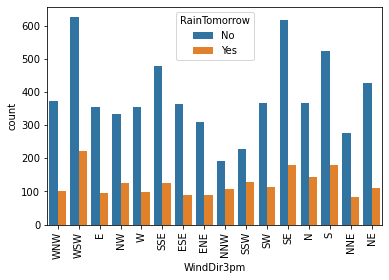

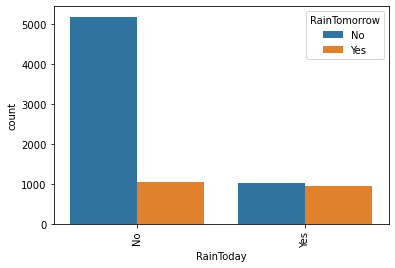

In [65]:
category=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['RainTomorrow'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

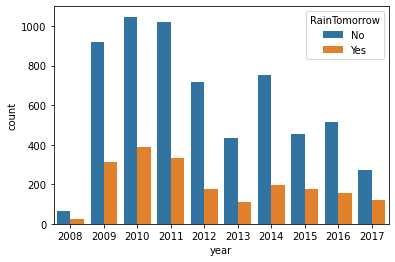

In [98]:
df['Date']=pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
sns.countplot(x='year',hue=df['RainTomorrow'],data=df)

Observation:We can observe that there are more chances of rainfall in year 2015,2016 and 2017.

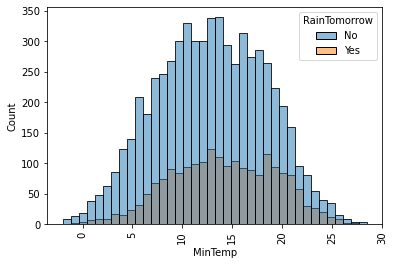

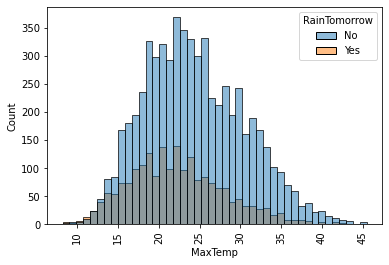

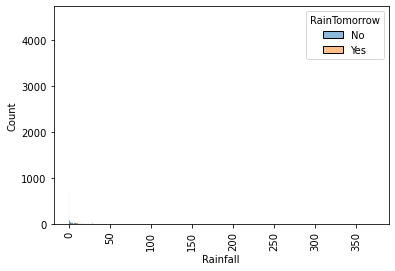

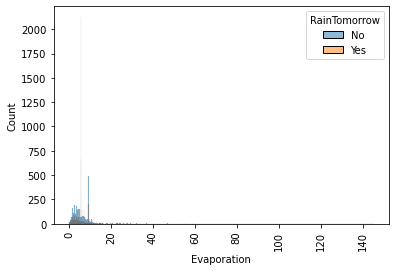

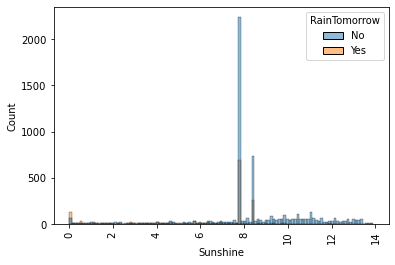

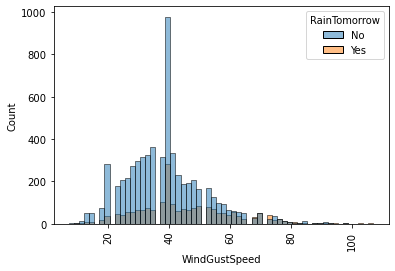

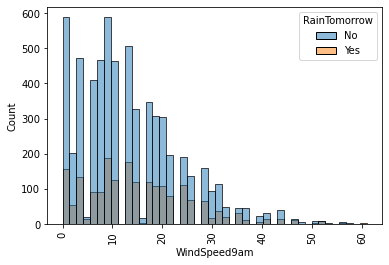

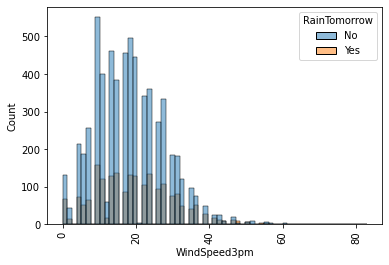

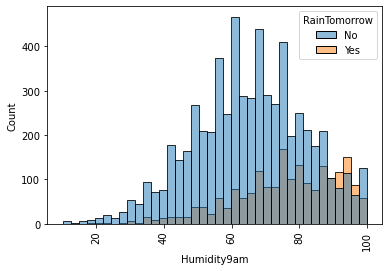

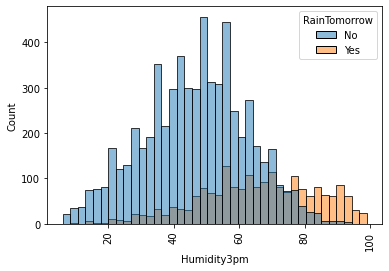

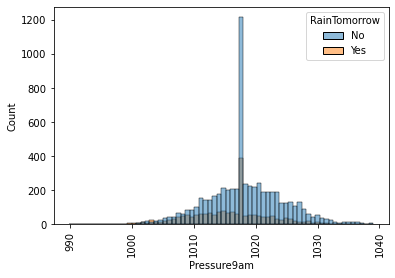

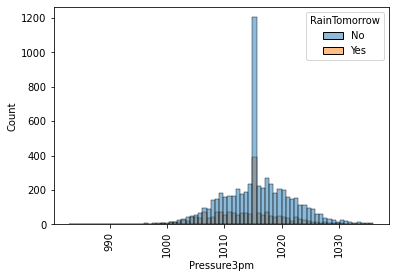

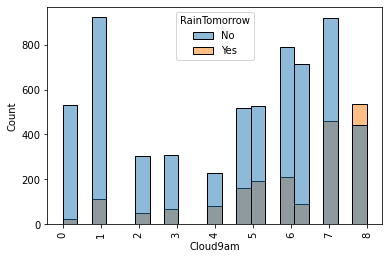

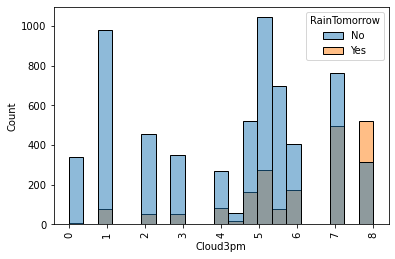

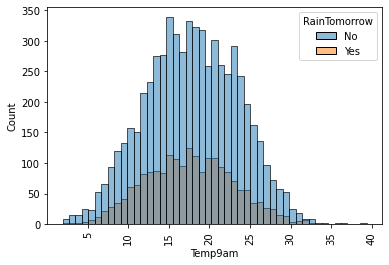

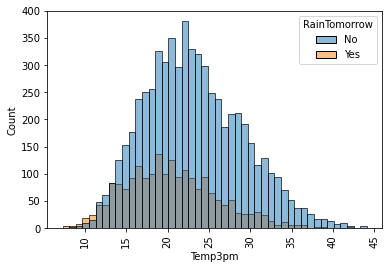

In [66]:
contd=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in contd:
    a=sns.histplot(x=df[i],hue=df['RainTomorrow'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation:If minimum temperature is below 5 and higher then 20 then there are higher chances of raining tomorrow.If 
    maximum temperature is less then 18 then higher chances of raining tomorrow.Lesser the value of sunshine higher the 
    chances of rain tomorrow.Higher the chances of raning tomorrow if the windGustSpeed is between 60 to 80.If the
    humidity9am is greater then 90 and if humidity3pm>78 then higher chances of rain tomorrow.If the value od cloud9am and 
    cloud3pm is 8 then higher chances of rain. Higher chances of rain if Temp3pm is less than 12.

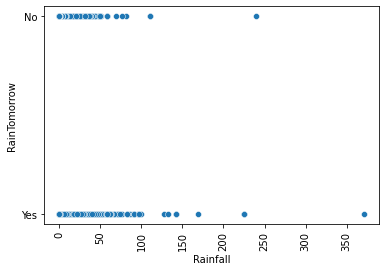

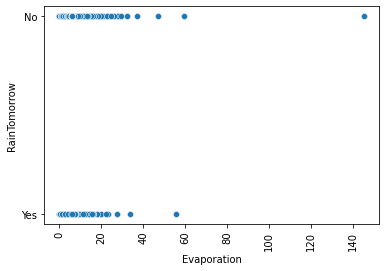

In [68]:
# For better understanding Rainfall and Evaporation we will plot scatter plot
for i in ['Rainfall','Evaporation']:
    a=sns.scatterplot(x=df[i],y=df['RainTomorrow'],data=df)
    plt.xlabel(i)
    plt.ylabel('RainTomorrow')
    plt.xticks(rotation=90)
    plt.show()

## Encoding Object data

In [99]:
#We will drop date feature as we have already appended year feature above.
df=df.drop(['Date'],axis=1)

In [100]:
category=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','year']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1

In [72]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,1.0,13.4,22.9,0.6,5.871464,7.775937,13.0,44.0,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0.0,No,0.0
1,1.0,7.4,25.1,0.0,5.871464,7.775937,14.0,44.0,6.0,15.0,...,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0.0,No,0.0
2,1.0,12.9,25.7,0.0,5.871464,7.775937,15.0,46.0,13.0,15.0,...,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0.0,No,0.0
3,1.0,9.2,28.0,0.0,5.871464,7.775937,4.0,24.0,9.0,0.0,...,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0.0,No,0.0
4,1.0,17.5,32.3,1.0,5.871464,7.775937,13.0,41.0,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,No,0.0


## Encoding the label using label encoding

In [101]:
le=LabelEncoder()
df1=le.fit_transform(df['RainTomorrow'])
df['RainTomorrow']=df1
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,1.0,13.4,22.9,0.6,5.871464,7.775937,13.0,44.0,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0.0,0,0.0
1,1.0,7.4,25.1,0.0,5.871464,7.775937,14.0,44.0,6.0,15.0,...,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0.0,0,0.0
2,1.0,12.9,25.7,0.0,5.871464,7.775937,15.0,46.0,13.0,15.0,...,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0.0,0,0.0
3,1.0,9.2,28.0,0.0,5.871464,7.775937,4.0,24.0,9.0,0.0,...,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0.0,0,0.0
4,1.0,17.5,32.3,1.0,5.871464,7.775937,13.0,41.0,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,0.0


## Correlation between features and label

In [74]:
df.corr().abs()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Location,1.000000,0.110240,0.055529,0.007971,0.241850,0.094214,0.007310,0.237755,0.030279,0.022699,...,0.056679,0.026353,0.012740,0.029825,0.020984,0.110654,0.052030,0.007298,0.006746,0.479563
MinTemp,0.110240,1.000000,0.717247,0.088299,0.255531,0.053151,0.145423,0.227615,0.041773,0.157540,...,0.080339,0.427692,0.420148,0.055201,0.023375,0.887642,0.685446,0.070321,0.098840,0.032287
MaxTemp,0.055529,0.717247,1.000000,0.087772,0.316824,0.375024,0.210047,0.135803,0.215857,0.188639,...,0.420707,0.322606,0.398861,0.249733,0.253076,0.864713,0.974700,0.224353,0.154355,0.108139
Rainfall,0.007971,0.088299,0.087772,1.000000,0.030051,0.169720,0.055217,0.085873,0.094814,0.039043,...,0.236661,0.073605,0.034169,0.162676,0.140634,0.006684,0.090842,0.461512,0.222031,0.006549
Evaporation,0.241850,0.255531,0.316824,0.030051,1.000000,0.240932,0.027154,0.129575,0.031284,0.048192,...,0.127351,0.165293,0.175825,0.005797,0.068892,0.301023,0.310348,0.074301,0.050493,0.283194
Sunshine,0.094214,0.053151,0.375024,0.169720,0.240932,1.000000,0.084689,0.009283,0.067303,0.066802,...,0.431932,0.021290,0.036048,0.509069,0.542474,0.248317,0.392654,0.234809,0.338661,0.114814
WindGustDir,0.007310,0.145423,0.210047,0.055217,0.027154,0.084689,1.000000,0.016626,0.282694,0.514143,...,0.104929,0.109442,0.033114,0.067102,0.062867,0.167113,0.221045,0.116779,0.046017,0.127984
WindGustSpeed,0.237755,0.227615,0.135803,0.085873,0.129575,0.009283,0.016626,1.000000,0.072084,0.061679,...,0.091395,0.402999,0.367903,0.009574,0.072210,0.198942,0.096865,0.081207,0.198635,0.044327
WindDir9am,0.030279,0.041773,0.215857,0.094814,0.031284,0.067303,0.282694,0.072084,1.000000,0.215578,...,0.123622,0.010344,0.074554,0.101629,0.069380,0.101981,0.223554,0.158760,0.034902,0.016407
WindDir3pm,0.022699,0.157540,0.188639,0.039043,0.048192,0.066802,0.514143,0.061679,0.215578,1.000000,...,0.012918,0.131800,0.043301,0.077056,0.063614,0.177138,0.199781,0.100279,0.015112,0.030085


<AxesSubplot:>

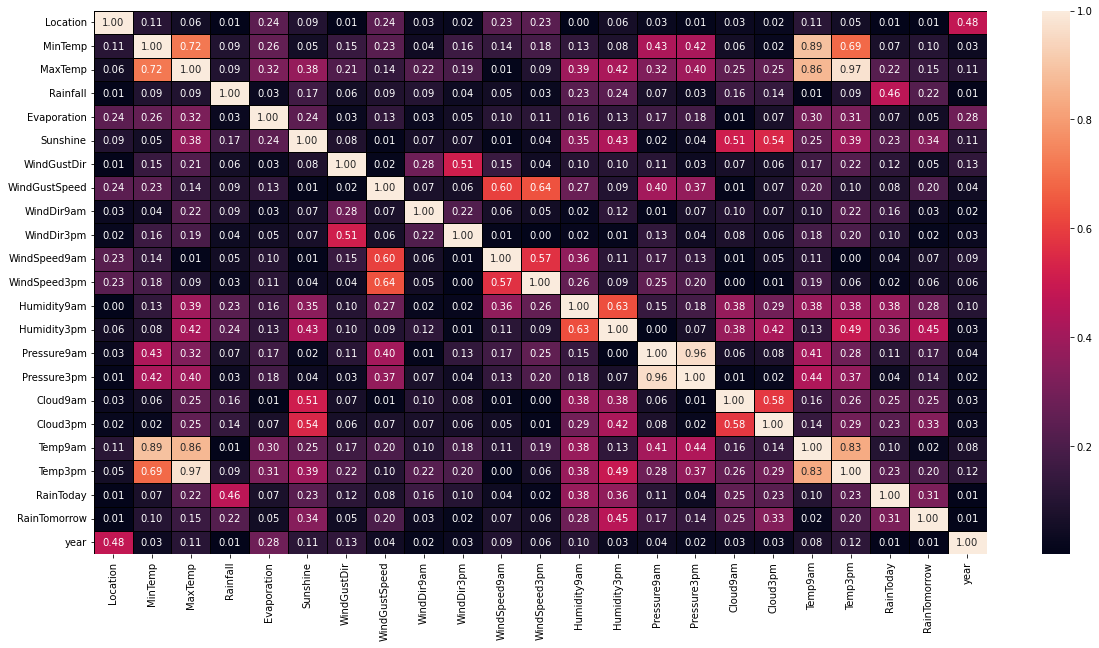

In [75]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

## VIF

In [76]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,6.776606,Location
1,56.938231,MinTemp
2,429.620389,MaxTemp
3,1.409701,Rainfall
4,4.066706,Evaporation
5,16.119192,Sunshine
6,6.201559,WindGustDir
7,22.601304,WindGustSpeed
8,4.482332,WindDir9am
9,5.926750,WindDir3pm


## Checking Outliers

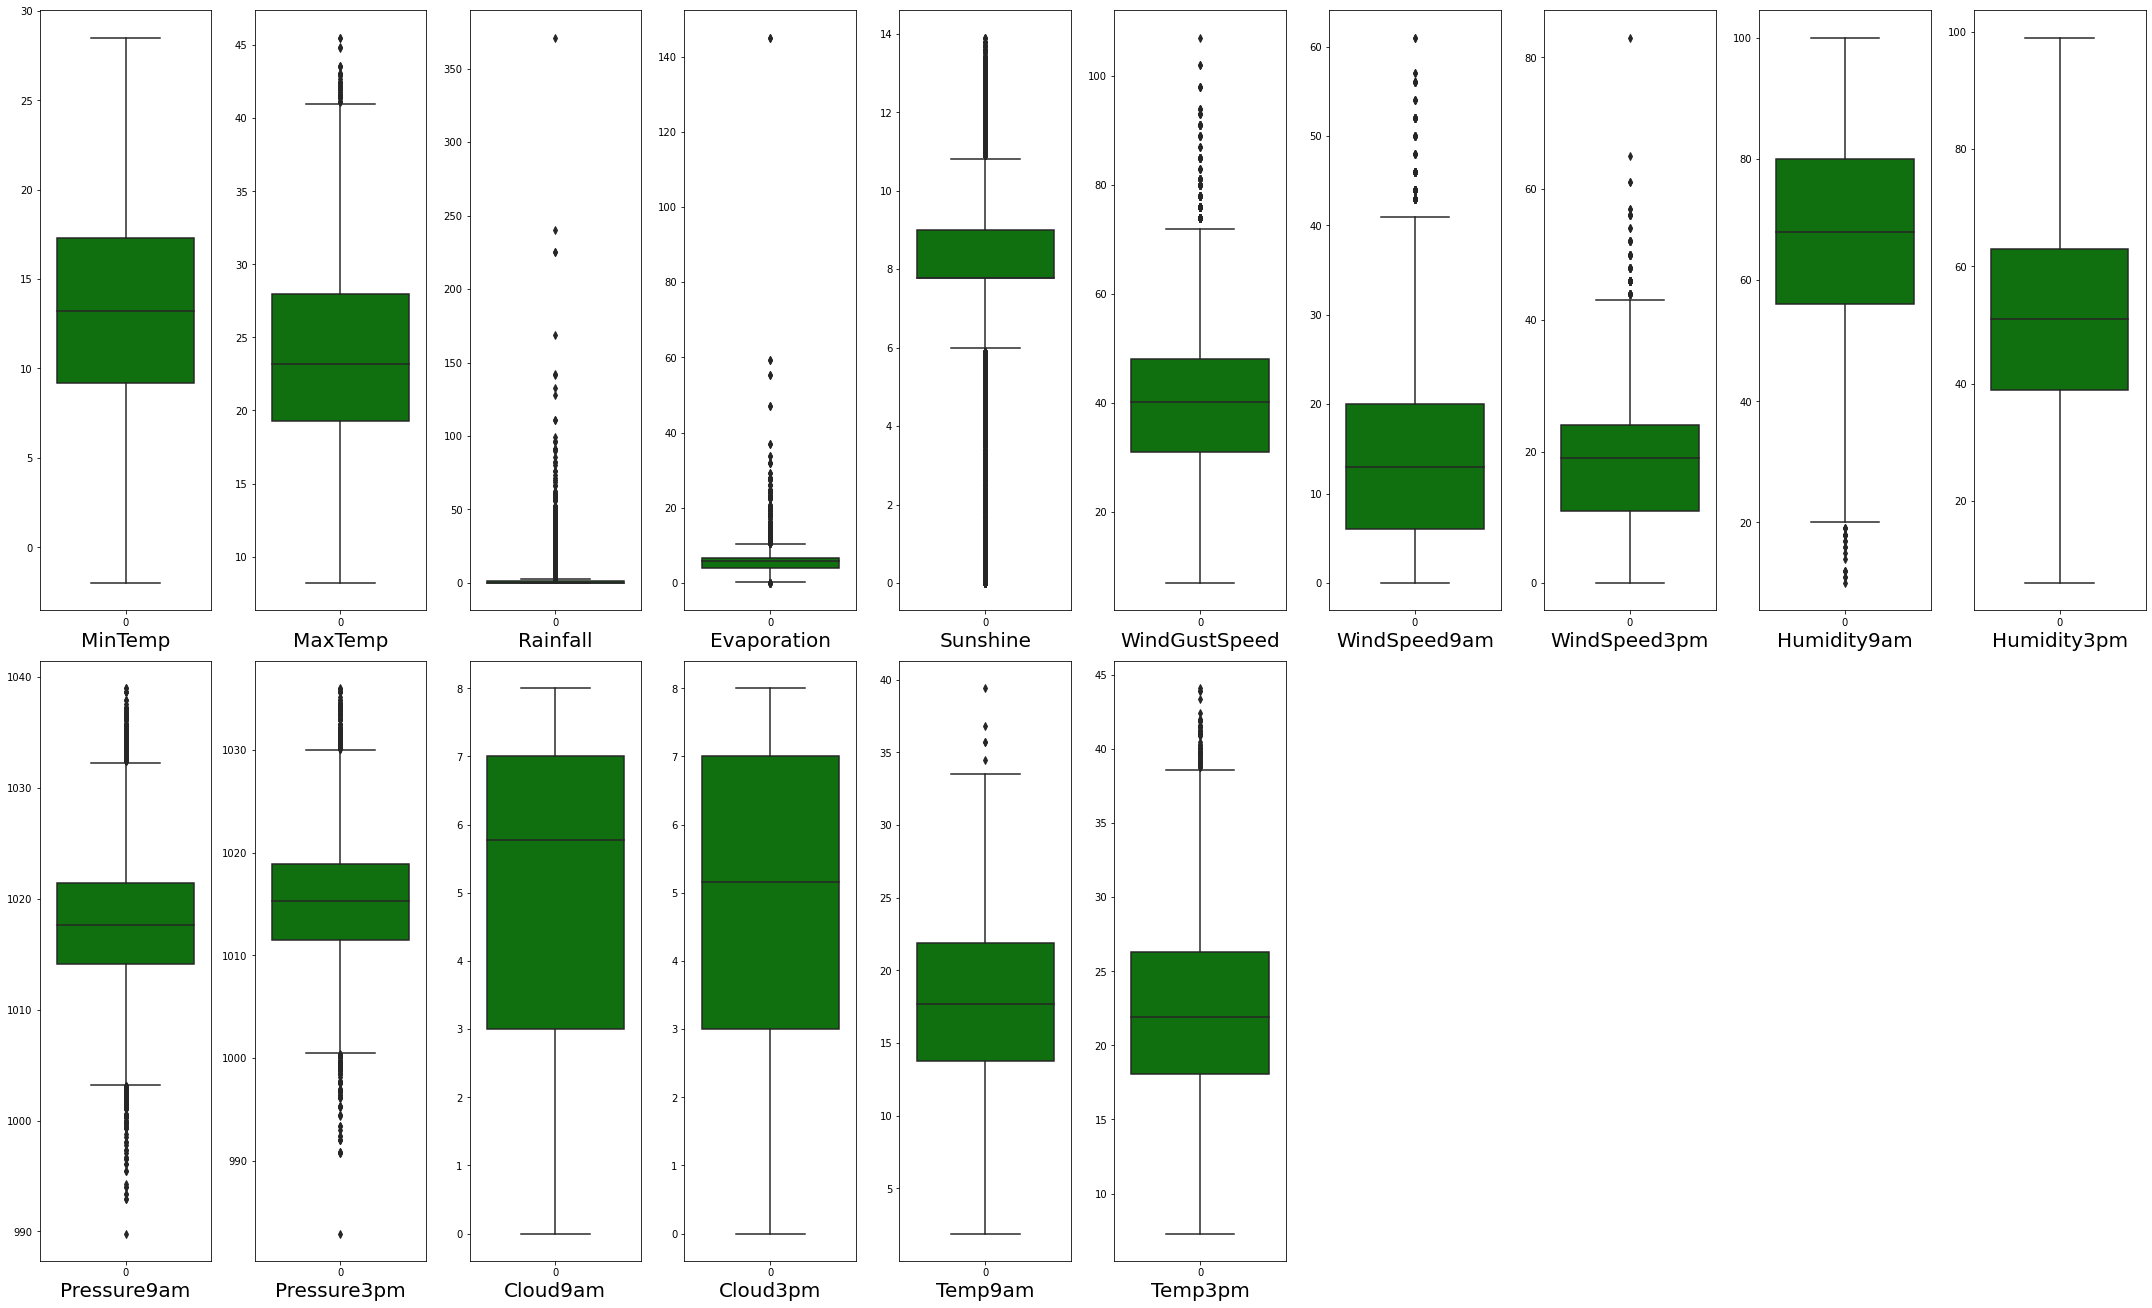

In [78]:
col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

## Checking Skewness

In [79]:
df.skew()

Location         -0.048025
MinTemp          -0.072154
MaxTemp           0.392466
Rainfall         13.159703
Evaporation      12.411563
Sunshine         -0.858660
WindGustDir      -0.252569
WindGustSpeed     0.734623
WindDir9am        0.171192
WindDir3pm       -0.106965
WindSpeed9am      0.941900
WindSpeed3pm      0.516726
Humidity9am      -0.259404
Humidity3pm       0.111864
Pressure9am      -0.027008
Pressure3pm      -0.011023
Cloud9am         -0.634091
Cloud3pm         -0.472321
Temp9am          -0.007578
Temp3pm           0.405151
RainToday         1.222214
RainTomorrow      1.197253
year              0.425109
dtype: float64

We would get sure of skewness by creating distplot.

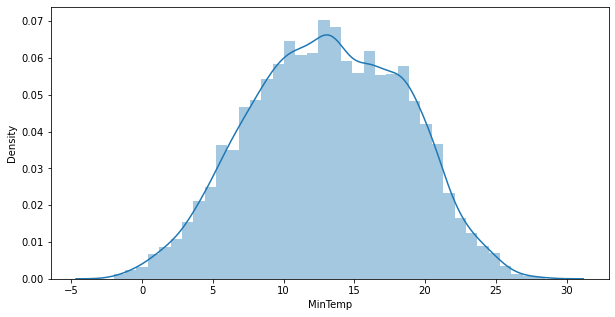

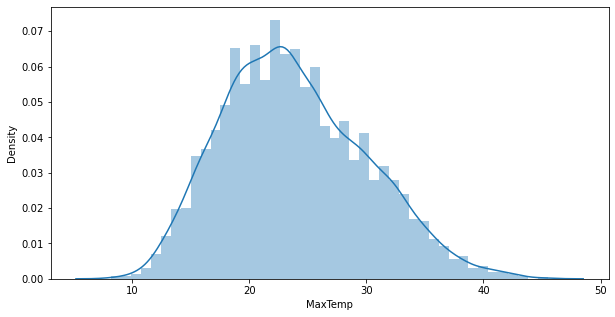

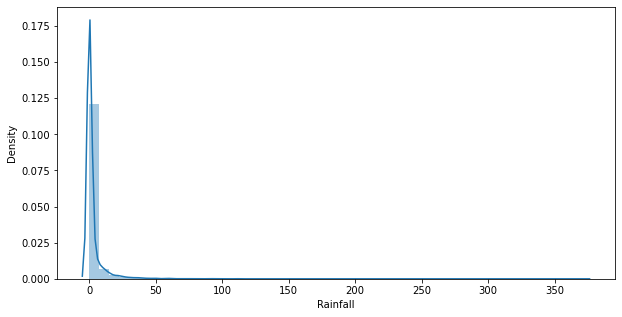

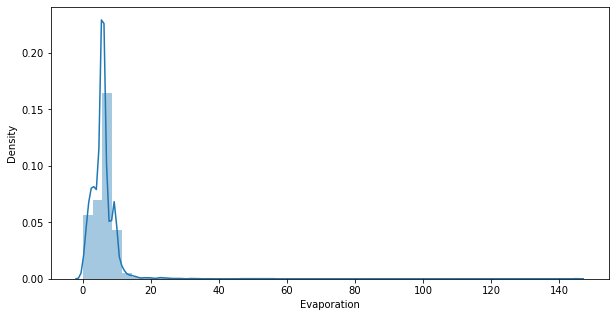

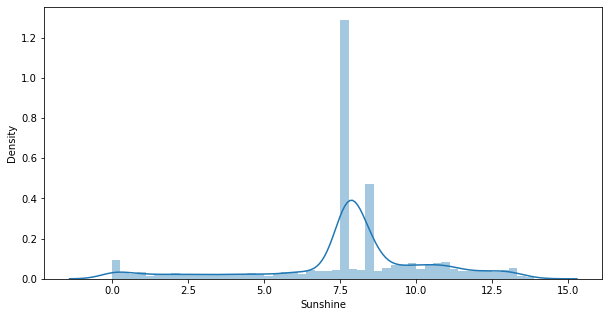

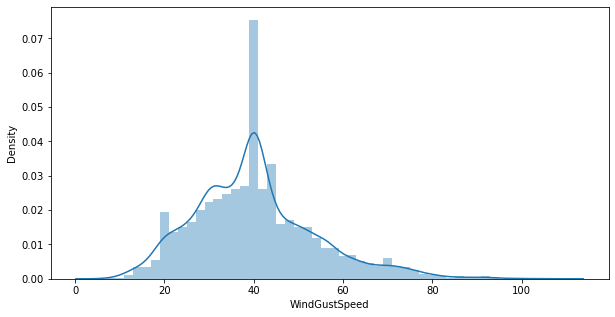

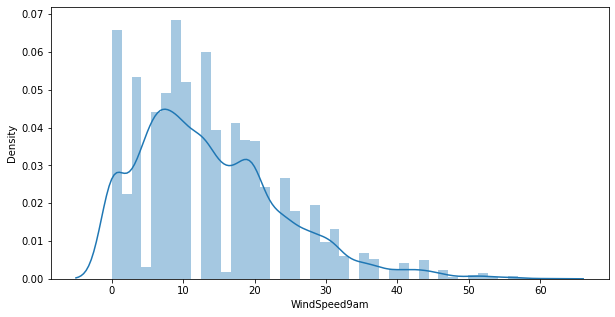

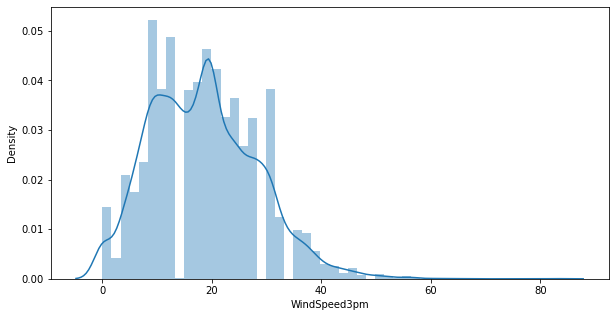

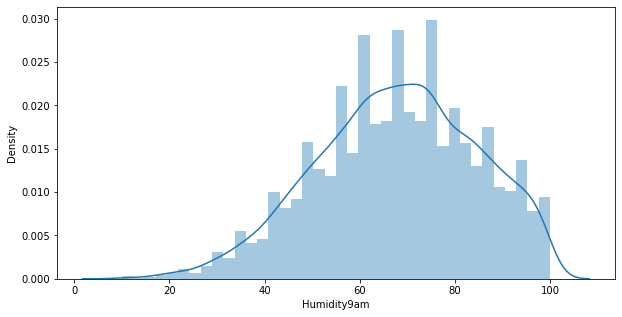

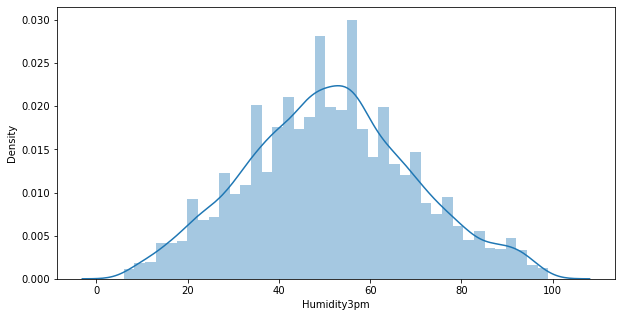

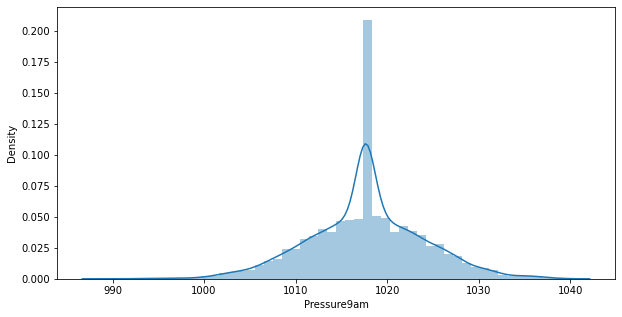

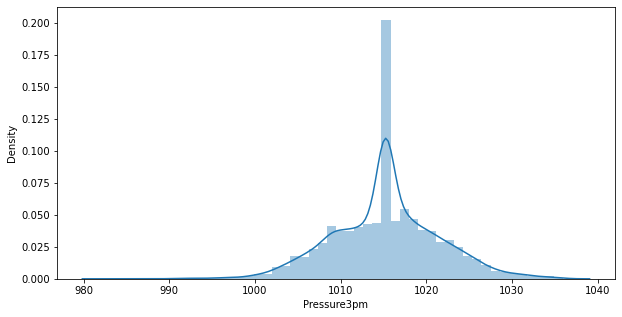

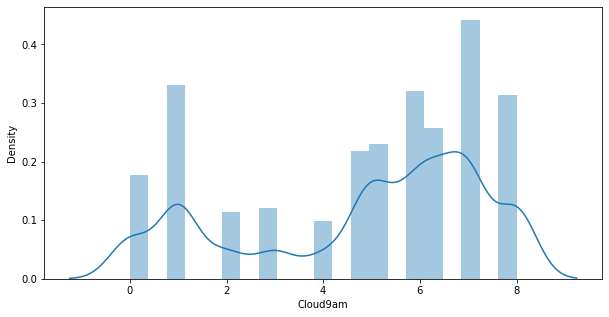

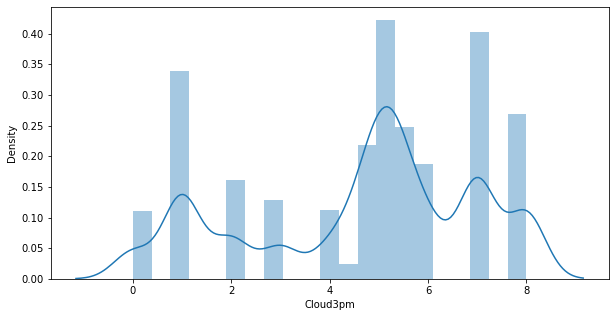

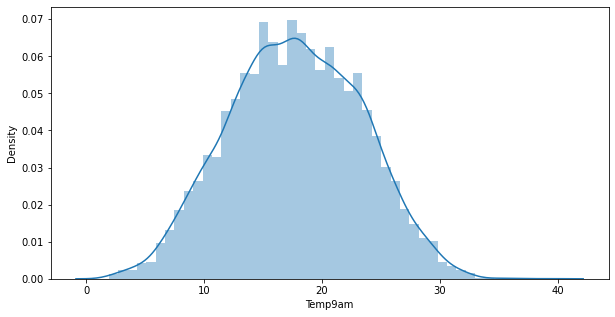

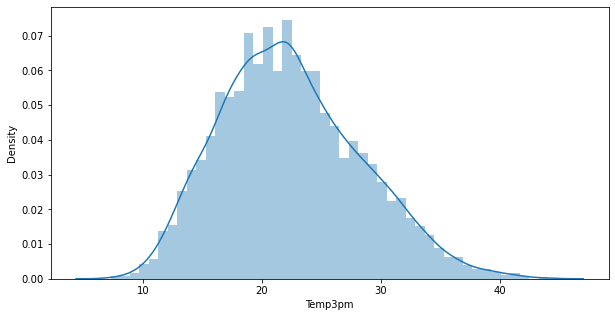

In [80]:
#Plotting dist plot
col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
import warnings
warnings.filterwarnings('ignore')
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)
    

Our observation was correct, many features are skewed.

## Treating outliers

In [102]:
#Getting sure of outliers using z score
x=df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {4096, 2056, 12, 2090, 43, 2098, 51, 59, 60, 61, 6208, 66, 67, 4165, 4167, 4176, 4193, 4194, 6247, 6248, 4202, 6256, 2164, 4215, 122, 2177, 4235, 6286, 2195, 2206, 2207, 2241, 4301, 6349, 6350, 4315, 4346, 4347, 4351, 4360, 266, 4364, 294, 4419, 4426, 2405, 4457, 4459, 379, 6524, 403, 404, 405, 6552, 4509, 4510, 2463, 6559, 6560, 2475, 429, 4529, 4541, 4548, 2501, 455, 2515, 4563, 4564, 6614, 4569, 6626, 6628, 6629, 6642, 6648, 6651, 2567, 6668, 6669, 4622, 6680, 6687, 6692, 6695, 6696, 555, 560, 561, 4666, 4670, 4671, 6722, 4689, 594, 6740, 2650, 2651, 4705, 6755, 4724, 4728, 4734, 4745, 4746, 4750, 2708, 674, 4777, 4783, 690, 4786, 704, 4802, 4809, 4825, 6873, 739, 2798, 4847, 4851, 2806, 761, 2815, 2821, 4870, 2825, 6924, 2829, 787, 788, 2835, 6931, 793, 2843, 2849, 4899, 6948, 6949, 6950, 2856, 2857, 2863, 2864, 2866, 2867, 2871, 4921, 2875, 2877, 2885, 2891, 2899, 2905, 2913, 2919, 2927, 2933, 2938, 7044, 4998, 2952, 5010, 2966, 7065, 925, 5024, 939, 5040, 5041, 7

In [103]:
df.shape

(8186, 23)

In [104]:
#Finding data loss
no_row_dropped=419
loss=(8186-419)/8186
loss=(1-loss)*100
print("data loss-",loss)

data loss- 5.118494991448818


We could bear with 5% data loss, so lets drop these rows.

In [105]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,1.0,13.4,22.9,0.6,5.871464,7.775937,13.0,44.0,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0.0,0,0.0
1,1.0,7.4,25.1,0.0,5.871464,7.775937,14.0,44.0,6.0,15.0,...,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0.0,0,0.0
2,1.0,12.9,25.7,0.0,5.871464,7.775937,15.0,46.0,13.0,15.0,...,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0.0,0,0.0
3,1.0,9.2,28.0,0.0,5.871464,7.775937,4.0,24.0,9.0,0.0,...,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0.0,0,0.0
4,1.0,17.5,32.3,1.0,5.871464,7.775937,13.0,41.0,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9.0,3.5,21.8,0.0,5.871464,7.775937,0.0,31.0,2.0,0.0,...,27.0,1024.7,1021.2,6.000000,5.285714,9.4,20.9,0.0,0,9.0
8420,9.0,2.8,23.4,0.0,5.871464,7.775937,0.0,31.0,9.0,1.0,...,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,0.0,0,9.0
8421,9.0,3.6,25.3,0.0,5.871464,7.775937,6.0,22.0,9.0,3.0,...,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,0.0,0,9.0
8422,9.0,5.4,26.9,0.0,5.871464,7.775937,3.0,37.0,9.0,14.0,...,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,0.0,0,9.0


In [106]:
#Checking skewness
df.skew()

Location        -0.037372
MinTemp         -0.067920
MaxTemp          0.323800
Rainfall         3.490545
Evaporation      0.424183
Sunshine        -0.867032
WindGustDir     -0.260971
WindGustSpeed    0.511270
WindDir9am       0.160410
WindDir3pm      -0.110267
WindSpeed9am     0.716103
WindSpeed3pm     0.322737
Humidity9am     -0.237024
Humidity3pm      0.119692
Pressure9am      0.029125
Pressure3pm      0.055456
Cloud9am        -0.621122
Cloud3pm        -0.459204
Temp9am         -0.033363
Temp3pm          0.338427
RainToday        1.282909
RainTomorrow     1.250452
year             0.436512
dtype: float64

## Checking data is balanced or not

In [107]:
df['RainTomorrow'].value_counts()

0    5942
1    1825
Name: RainTomorrow, dtype: int64

Observation: Data seems to be highly imbalanced

## Dataset Balancing

In [109]:
from sklearn.utils import resample

NoRain=df[df.RainTomorrow==0]
YesRain=df[df.RainTomorrow==1]
Yes_upsampled=resample(YesRain,replace=True,n_samples=len(NoRain),random_state=27)
df_up=pd.concat([NoRain,Yes_upsampled])
df_up['RainTomorrow'].value_counts()

0    5942
1    5942
Name: RainTomorrow, dtype: int64

## Treating Skewness

In [110]:
x=df_up.drop(['RainTomorrow'],axis=1)
y=df_up['RainTomorrow']

In [111]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-1.55532777,  0.0024714 ,  0.01718613, ...,  0.09192499,
        -0.66145497, -2.42684692],
       [-1.55532777, -1.1088519 ,  0.37689463, ...,  0.5057688 ,
        -0.66145497, -2.42684692],
       [-1.55532777, -0.08993948,  0.47189602, ...,  0.32675159,
        -0.66145497, -2.42684692],
       ...,
       [-0.49366774,  1.93730752,  1.52600776, ...,  1.67559557,
        -0.66145497,  0.1586696 ],
       [-0.17340816, -1.12742648, -2.28616817, ..., -2.352892  ,
         1.51181871, -0.7817216 ],
       [-1.17871369,  1.56949066,  0.86977893, ...,  0.37603591,
        -0.66145497, -0.26751618]])

## Standardization

In [112]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.55532777,  0.0024714 ,  0.01718613, ...,  0.09192499,
        -0.66145497, -2.42684692],
       [-1.55532777, -1.1088519 ,  0.37689463, ...,  0.5057688 ,
        -0.66145497, -2.42684692],
       [-1.55532777, -0.08993948,  0.47189602, ...,  0.32675159,
        -0.66145497, -2.42684692],
       ...,
       [-0.49366774,  1.93730752,  1.52600776, ...,  1.67559557,
        -0.66145497,  0.1586696 ],
       [-0.17340816, -1.12742648, -2.28616817, ..., -2.352892  ,
         1.51181871, -0.7817216 ],
       [-1.17871369,  1.56949066,  0.86977893, ...,  0.37603591,
        -0.66145497, -0.26751618]])

## Treating multicollinearity

WE would drop high vif score feature to treat multicollinearity but we need to drop many features in that case which is not a good idea and might effect our model performance so better we can use PCA.

## PCA for feature selection and multicollinearity

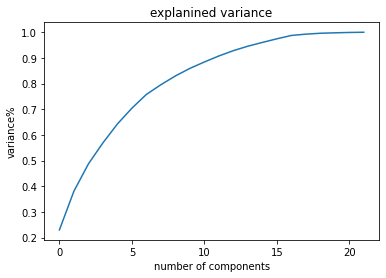

In [113]:
from sklearn.decomposition import PCA
pca=PCA()
p_components=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance%")
plt.title("explanined variance")
plt.show()

Observation: We can see that approx 98% of the variance is explained by 19 components so instead of passing all the 23 components in model lets use only 19.

In [114]:
pca=PCA(n_components=19)
new_data=pca.fit_transform(x)
px=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
px

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.346127,1.151510,1.864401,-1.117338,-2.659688,0.141784,1.403917,0.997439,1.423785,-0.600792,0.829764,1.364572,0.519896,0.123146,0.210680,-0.007219,0.809449,-0.607956,0.476986
1,1.001207,-0.474376,1.613587,-1.261279,-3.234589,-0.452787,0.777847,-0.010156,2.052109,-0.317495,0.549141,0.333361,0.929062,0.460580,-0.721999,0.446280,-0.292820,0.517585,0.089922
2,1.786856,0.278767,2.571074,-0.880965,-3.052418,0.353900,1.947843,0.564955,0.970253,-0.023572,0.464328,0.901527,0.454442,-0.849536,-0.434654,0.012959,-0.202498,0.198211,0.022804
3,1.559646,-1.832021,-0.131416,-3.093417,-0.662215,0.540067,0.980438,1.551839,0.984179,-1.577670,0.216184,-0.106674,1.606977,-0.194223,-0.096903,0.088493,0.445188,0.325144,0.119439
4,1.349304,1.425543,-0.735155,-2.154330,-1.970119,-0.269408,0.040237,-0.564486,2.237116,0.107459,1.131736,0.060787,1.085853,0.988526,0.019358,-0.263745,1.500906,-0.338426,0.772785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11879,-3.048282,2.778860,-0.227292,0.049191,-0.598752,-0.490978,-0.602592,-1.344423,-0.127173,0.070856,-1.318983,0.428903,0.391021,-0.171308,-0.532354,-0.342651,0.679272,0.561491,-0.023047
11880,2.691927,0.342107,-1.490692,-1.641677,0.254104,0.594694,0.720090,0.951963,-1.280325,0.112796,-0.392219,-1.474791,-0.618325,0.960260,0.396825,-0.261084,0.015736,-0.566048,0.142209
11881,4.100345,1.650722,-0.687577,-1.800378,1.259087,-0.745513,-0.158908,0.616332,0.691867,-0.409830,0.238358,-0.313638,-0.339740,0.224557,0.388369,-1.051782,0.217251,-0.372755,-0.176080
11882,-4.092563,3.147917,1.000514,-2.514841,-1.380435,-0.113517,-2.264593,0.787881,-1.707527,-0.769729,-1.435100,-0.020106,0.424636,-0.134730,-0.281271,-0.385781,-0.333673,0.108708,0.020521


## Train test split

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 20

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 45

Train Accuracy-  77.5

Test Accuracy-  77.5


At random state: 56

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 62

Train Accuracy-  78.0

Test Accuracy-  78.0


At random state: 96

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 172

Train Accuracy-  77.4

Test Accuracy-  77.4


At random state: 252

Train Accuracy-  77.9

Test Accuracy-  77.9


At random state: 302

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 329

Train Accuracy-  77.5

Test Accuracy-  77.5


At random state: 341

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 353

Train Accuracy-  77.5

Test Accuracy-  77.5


At random state: 369

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 394

Train Accuracy-  77.5

Test Accuracy-  77.5


At random state: 448

Train Accuracy-  77.6

Test Accuracy-  77.6


At random state: 459

Train Accuracy-  77.4

Test A

In [146]:
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=62,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 78.0

test accuracy- 78.0


## Cross Validation Score

In [117]:
for i in range(4,20):
    cv_score=cross_val_score(lr,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 70.75058902726356

 Accuracy score is- 78.0


At cv- 5

 cross validation score is- 71.651761621261

 Accuracy score is- 78.0


At cv- 6

 cross validation score is- 70.88663430536222

 Accuracy score is- 78.0


At cv- 7

 cross validation score is- 73.04069469228936

 Accuracy score is- 78.0


At cv- 8

 cross validation score is- 73.41090356231675

 Accuracy score is- 78.0


At cv- 9

 cross validation score is- 73.87339837945439

 Accuracy score is- 78.0


At cv- 10

 cross validation score is- 73.35993804034175

 Accuracy score is- 78.0


At cv- 11

 cross validation score is- 74.18444388379633

 Accuracy score is- 78.0


At cv- 12

 cross validation score is- 74.73978771910156

 Accuracy score is- 78.0


At cv- 13

 cross validation score is- 74.94069644767353

 Accuracy score is- 78.0


At cv- 14

 cross validation score is- 74.65599889198964

 Accuracy score is- 78.0


At cv- 15

 cross validation score is- 74.90847949864342

 Accuracy sco

So we are getting the least difference between cross_val_score and accuracy score at cv=19

In [118]:
cv_score_best=cross_val_score(lr,px,y,cv=19).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 75.53163611905164
accuracy score for linear regression model is- 78.0


## Generating Confusion Matrix

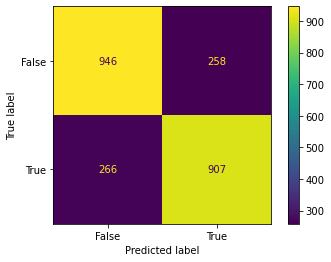

In [119]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

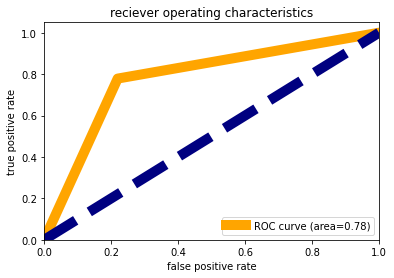

In [120]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [147]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1204
           1       0.78      0.77      0.78      1173

    accuracy                           0.78      2377
   macro avg       0.78      0.78      0.78      2377
weighted avg       0.78      0.78      0.78      2377



## Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 100.0
acc test 93.0


## Cross Validation Score

In [122]:
for i in range(4,15):
    cv_score=cross_val_score(dt,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",dt_acc_test)



At cv- 4

 cross validation score is- 84.34870414002019

 Accuracy score is- 93.5


At cv- 5

 cross validation score is- 87.30238154933149

 Accuracy score is- 93.5


At cv- 6

 cross validation score is- 86.6802681025296

 Accuracy score is- 93.5


At cv- 7

 cross validation score is- 88.69090875198098

 Accuracy score is- 93.5


At cv- 8

 cross validation score is- 90.14764060524492

 Accuracy score is- 93.5


At cv- 9

 cross validation score is- 90.68592816889561

 Accuracy score is- 93.5


At cv- 10

 cross validation score is- 90.85462842611707

 Accuracy score is- 93.5


At cv- 11

 cross validation score is- 90.90603070482811

 Accuracy score is- 93.5


At cv- 12

 cross validation score is- 92.40338127320973

 Accuracy score is- 93.5


At cv- 13

 cross validation score is- 92.40216408527202

 Accuracy score is- 93.5


At cv- 14

 cross validation score is- 92.29194644722345

 Accuracy score is- 93.5


So we are getting the least difference between cross_val_score and accuracy score at cv=14

In [125]:
cv_score_best_dt=cross_val_score(dt,px,y,cv=14).mean()*100
print("cross validation score is-",cv_score_best_dt)
print("accuracy score for decision tree classifier model is-",dt_acc_test)

cross validation score is- 92.22464037285025
accuracy score for decision tree classifier model is- 93.5


## Confusion Matrix

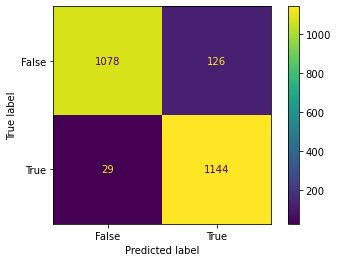

In [126]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

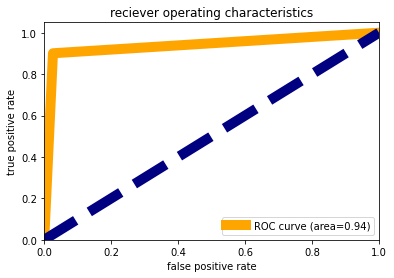

In [127]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## classification Report

In [150]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1204
           1       0.89      0.97      0.93      1173

    accuracy                           0.93      2377
   macro avg       0.93      0.93      0.93      2377
weighted avg       0.93      0.93      0.93      2377



## Knn Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
max_ac=0
randomState=0
knn=KNeighborsClassifier()
for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=i,test_size=0.25)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  90.5

Test Accuracy-  84.7


At random state: 1

Train Accuracy-  90.0

Test Accuracy-  85.1


At random state: 2

Train Accuracy-  90.5

Test Accuracy-  85.0


At random state: 3

Train Accuracy-  89.9

Test Accuracy-  85.8


At random state: 4

Train Accuracy-  90.7

Test Accuracy-  83.6


At random state: 5

Train Accuracy-  90.3

Test Accuracy-  84.6


At random state: 6

Train Accuracy-  90.2

Test Accuracy-  84.2


At random state: 7

Train Accuracy-  90.5

Test Accuracy-  84.8


At random state: 8

Train Accuracy-  90.2

Test Accuracy-  85.7


At random state: 9

Train Accuracy-  90.1

Test Accuracy-  84.9


At random state: 10

Train Accuracy-  90.4

Test Accuracy-  85.1


At random state: 11

Train Accuracy-  90.5

Test Accuracy-  84.7


At random state: 12

Train Accuracy-  90.0

Test Accuracy-  85.1


At random state: 13

Train Accuracy-  90.3

Test Accuracy-  84.7


At random state: 14

Train Accuracy-  90.1

Test Accuracy-  84.2


At 

In [151]:
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=28,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  90.4

Test Accuracy-  87.9


## Cross Validation Score

In [130]:
for i in range(4,15):
    cv_score=cross_val_score(knn,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_test_acc)



At cv- 4

 cross validation score is- 67.63715920565467

 Accuracy score is- 87.9


At cv- 5

 cross validation score is- 70.35536617046925

 Accuracy score is- 87.9


At cv- 6

 cross validation score is- 69.76746686110644

 Accuracy score is- 87.9


At cv- 7

 cross validation score is- 73.57896976690066

 Accuracy score is- 87.9


At cv- 8

 cross validation score is- 75.86027389190242

 Accuracy score is- 87.9


At cv- 9

 cross validation score is- 77.28182022088154

 Accuracy score is- 87.9


At cv- 10

 cross validation score is- 77.15582372647133

 Accuracy score is- 87.9


At cv- 11

 cross validation score is- 78.16659502829715

 Accuracy score is- 87.9


At cv- 12

 cross validation score is- 80.28609335874725

 Accuracy score is- 87.9


At cv- 13

 cross validation score is- 80.89004537331115

 Accuracy score is- 87.9


At cv- 14

 cross validation score is- 79.99877571203159

 Accuracy score is- 87.9


So we are getting the least difference between cross_val_score and accuracy score at cv=13

In [131]:
cv_score_best_knn=cross_val_score(knn,px,y,cv=13).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 80.89004537331115
accuracy score for Knn classifier model is- 87.9


## Confusion Matrix

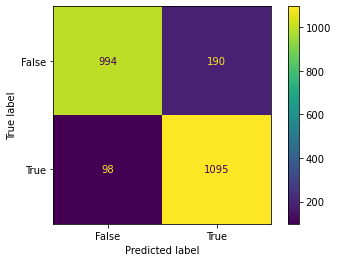

In [132]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

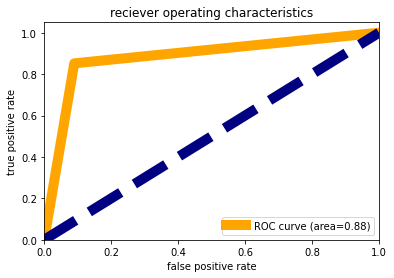

In [133]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [152]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1184
           1       0.85      0.92      0.88      1193

    accuracy                           0.88      2377
   macro avg       0.88      0.88      0.88      2377
weighted avg       0.88      0.88      0.88      2377



## Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
max_ac=0
randomState=0

for i in range(40):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=i,test_size=0.25)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  100.0

Test Accuracy-  95.3


At random state: 1

Train Accuracy-  100.0

Test Accuracy-  96.2


At random state: 2

Train Accuracy-  100.0

Test Accuracy-  95.7


At random state: 3

Train Accuracy-  100.0

Test Accuracy-  96.8


At random state: 4

Train Accuracy-  100.0

Test Accuracy-  96.0


At random state: 5

Train Accuracy-  100.0

Test Accuracy-  96.4


At random state: 6

Train Accuracy-  100.0

Test Accuracy-  96.6


At random state: 7

Train Accuracy-  100.0

Test Accuracy-  96.4


At random state: 8

Train Accuracy-  100.0

Test Accuracy-  95.6


At random state: 9

Train Accuracy-  100.0

Test Accuracy-  96.1


At random state: 10

Train Accuracy-  100.0

Test Accuracy-  96.0


At random state: 11

Train Accuracy-  100.0

Test Accuracy-  96.0


At random state: 12

Train Accuracy-  100.0

Test Accuracy-  96.1


At random state: 13

Train Accuracy-  100.0

Test Accuracy-  95.8


At random state: 14

Train Accuracy-  100.0

Test Accura

In [135]:
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=23,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  100.0

Test Accuracy-  97.3


## Cross Validation Score

In [136]:
for i in range(4,15):
    cv_score=cross_val_score(rf,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 86.59542241669472

 Accuracy score is- 97.3


At cv- 5

 cross validation score is- 89.69244400249869

 Accuracy score is- 97.3


At cv- 6

 cross validation score is- 89.14589271479731

 Accuracy score is- 97.3


At cv- 7

 cross validation score is- 91.31649511450907

 Accuracy score is- 97.3


At cv- 8

 cross validation score is- 93.08420680560654

 Accuracy score is- 97.3


At cv- 9

 cross validation score is- 94.32090906542079

 Accuracy score is- 97.3


At cv- 10

 cross validation score is- 94.06014164634855

 Accuracy score is- 97.3


At cv- 11

 cross validation score is- 94.3049676537188

 Accuracy score is- 97.3


At cv- 12

 cross validation score is- 95.33945237779747

 Accuracy score is- 97.3


At cv- 13

 cross validation score is- 95.47313611165535

 Accuracy score is- 97.3


At cv- 14

 cross validation score is- 95.69181596233399

 Accuracy score is- 97.3


So we are getting the least difference between cross_val_score and accuracy score at cv=14.

In [137]:
cv_score_best_rf=cross_val_score(rf,px,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest classifier model is-",rf_test_acc)

cross validation score is- 95.77619330560505
accuracy score for random forest classifier model is- 97.3


## Confusion Matrix

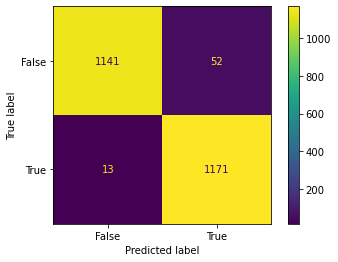

In [138]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## Generating AUC-ROC Curve

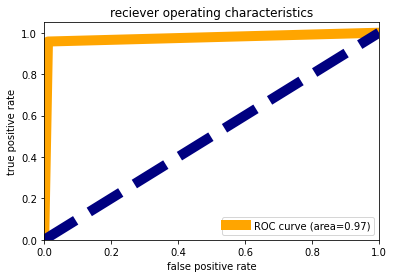

In [139]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [142]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1193
           1       0.96      0.99      0.97      1184

    accuracy                           0.97      2377
   macro avg       0.97      0.97      0.97      2377
weighted avg       0.97      0.97      0.97      2377



## XGBoost Classifier

In [154]:
from xgboost import XGBClassifier
xgmod=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=1,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
xg_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  99.7

Test Accuracy-  94.7


## Cross Validation Report

In [156]:
cv_score_best_xg=cross_val_score(xgmod,px,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 93.95062671533259
accuracy score for Knn classifier model is- 94.7


## Confusion Matrix

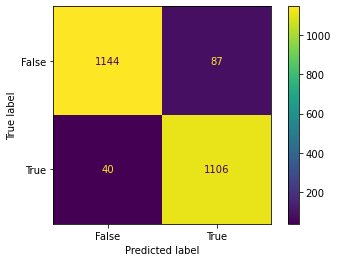

In [157]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

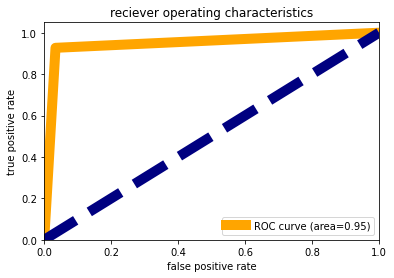

In [158]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [159]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1231
           1       0.93      0.97      0.95      1146

    accuracy                           0.95      2377
   macro avg       0.95      0.95      0.95      2377
weighted avg       0.95      0.95      0.95      2377



## Model Summary

In [160]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier','XGBoost']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc,xg_test_acc]
cv_score=[cv_score_best,cv_score_best_dt,cv_score_best_knn,cv_score_best_rf,cv_score_best_xg]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score)),columns=['Models','Test Accuracy','CV Score'])
dfm

,Models,Test Accuracy,CV Score
0,Logistic Regression,78.0,75.531636
1,Decision Tree Classifier,93.0,92.224640
2,Knn Classifier,87.9,80.890045
3,Random Forest Classifier,97.3,95.776193
4,XGBoost,94.7,93.950627


Observation: Looking at the confusion matrix, AUR-ROC Curve,classification report of each model and considering the least difference between cv score and aacuracy score we will finalise XGBoost classifier as our final model.

So now we will perform hyper parameter tuning on XGBoost in order to increase model performance.

## Hyperparameter Tuning on XGBoost Classifier

In [167]:
xgb=XGBClassifier()
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xgbt = GridSearchCV(estimator=xgb, n_jobs=-1, param_grid=params, cv=3, scoring='roc_auc')
xgbt.fit(x_train, y_train)

xgbt.best_params_

{'base_score': 0.5,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.1,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [168]:
xgb=XGBClassifier(base_score= 0.5,
 booster= 'gbtree',
 gamma= 0,
 learning_rate= 0.1,
 n_estimators= 500,
 reg_alpha= 0,
 reg_lambda= 0.5)
xgb.fit(x_train,y_train)
pred_train=xgb.predict(x_train)
pred_test=xgb.predict(x_test)
train_acc=round(accuracy_score(y_train,pred_train)*100,1)
test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  100.0

Test Accuracy-  95.8


## Accuracy improved from 94.7% to 95.8% by 1%. So we will finalize and save this model.

## Model Saving

In [169]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

## Part 2- Considering Rainfall as a label

In [136]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Checking nulls

In [3]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## Handling null values

In [137]:
#for continuous feature
df['MinTemp']=df['MinTemp'].fillna(df.groupby('Location')['MinTemp'].transform('mean'))
df['MaxTemp']=df['MaxTemp'].fillna(df.groupby('Location')['MaxTemp'].transform('mean'))
df['Evaporation']=df['Evaporation'].fillna(df.groupby('Location')['Evaporation'].transform('mean'))
df['Sunshine']=df['Sunshine'].fillna(df.groupby('Location')['Sunshine'].transform('mean'))
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df.groupby('Location')['WindGustSpeed'].transform('mean'))
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df.groupby('Location')['WindSpeed9am'].transform('mean'))
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df.groupby('Location')['WindSpeed3pm'].transform('mean'))
df['Humidity9am']=df['Humidity9am'].fillna(df.groupby('Location')['Humidity9am'].transform('mean'))
df['Humidity3pm']=df['Humidity3pm'].fillna(df.groupby('Location')['Humidity3pm'].transform('mean'))
df['Pressure9am']=df['Pressure9am'].fillna(df.groupby('Location')['Pressure9am'].transform('mean'))
df['Pressure3pm']=df['Pressure3pm'].fillna(df.groupby('Location')['Pressure3pm'].transform('mean'))
df['Cloud9am']=df['Cloud9am'].fillna(df.groupby('Location')['Cloud9am'].transform('mean'))
df['Cloud3pm']=df['Cloud3pm'].fillna(df.groupby('Location')['Cloud3pm'].transform('mean'))
df['Temp9am']=df['Temp9am'].fillna(df.groupby('Location')['Temp9am'].transform('mean'))
df['Temp3pm']=df['Temp3pm'].fillna(df.groupby('Location')['Temp3pm'].transform('mean'))

In [138]:
#for categorical feature
df['WindGustDir']=df['WindGustDir'].fillna(df.groupby('Location')['WindGustDir'].agg(pd.Series.mode)[0])
df['WindDir9am']=df['WindDir9am'].fillna(df.groupby('Location')['WindDir9am'].agg(pd.Series.mode)[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df.groupby('Location')['WindDir3pm'].agg(pd.Series.mode)[0])
df['RainToday']=df['RainToday'].fillna(df.groupby('Location')['RainToday'].agg(pd.Series.mode)[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df.groupby('Location')['RainTomorrow'].agg(pd.Series.mode)[0])

In [6]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall          240
Evaporation      2724
Sunshine         2929
WindGustDir         0
WindGustSpeed     822
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1304
Pressure3pm      1304
Cloud9am          687
Cloud3pm          687
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

Still null values we need to treat it.

In [139]:
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [8]:
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall         240
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

Null values are left in only label i.e. Rainfall, So we need to drop these rows in order to get rid of nulls. Before dropping those rows we will first check data loss.

## Handling null values in label i.e. Rainfall

In [9]:
#Finding data loss
no_row_dropped=239
loss=(8425-240)/8425
loss=(1-loss)*100
print("data loss-",loss)

data loss- 2.848664688427305


we can bear with 3% data loss so we would delete these rows.

In [140]:
i=df[df['Rainfall'].isnull()].index.tolist()
print(i)

[15, 284, 436, 438, 444, 453, 456, 465, 612, 929, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 2069, 2164, 2165, 2166, 2167, 2199, 2200, 2460, 2506, 2679, 2825, 2826, 2839, 2840, 2846, 2847, 2848, 2972, 2973, 2974, 3007, 3008, 3211, 3212, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3253, 3254, 3255, 3257, 3258, 3259, 3437, 3438, 3439, 3614, 3677, 3678, 3691, 3692, 3698, 3699, 3700, 3824, 3825, 3826, 3859, 3860, 4063, 4064, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4105, 4106, 4107, 4109, 4110, 4111, 4289, 4290, 4291, 4466, 5008, 5009, 5015, 5016, 5022, 5023, 5027, 5028, 5097, 5098, 5102, 5104, 5105, 5106, 5111, 5112, 5132, 5133, 5134, 5146, 5147, 5150, 5160, 5161, 5167, 5168, 5181, 5182, 5216, 5217, 5223, 5224, 5230, 5231, 5237, 5238, 5244, 5245, 5247, 5251, 5252, 5258, 5259, 5265, 5266, 5269, 5272, 5273, 5286, 5287, 5300, 5301, 5302, 5303, 5315, 5321, 5322, 53

In [141]:
df=df.drop(df.index[i])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.871464,7.775937,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.871464,7.775937,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.871464,7.775937,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.871464,7.775937,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.871464,7.775937,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.871464,7.775937,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.871464,7.775937,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.871464,7.775937,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.871464,7.775937,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


## Analysing relation between features and labels

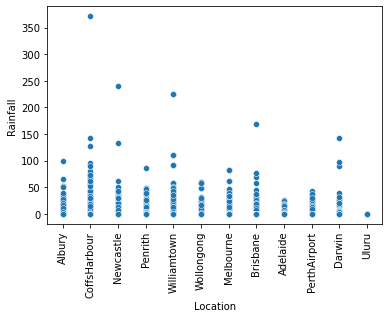

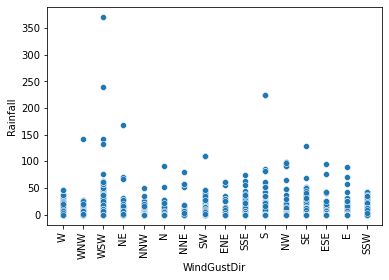

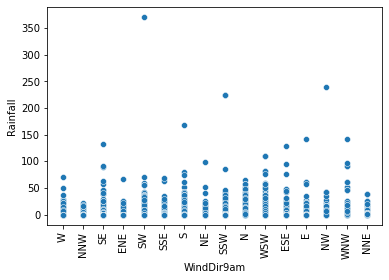

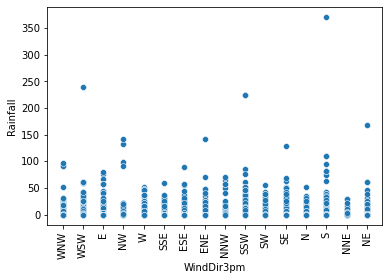

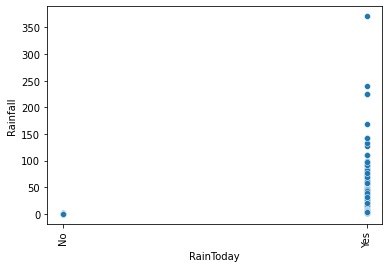

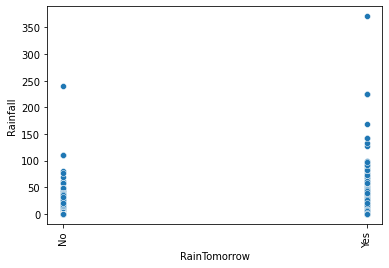

In [13]:
category=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
#Plotting count plot for each feature
for i in category:
    a=sns.scatterplot(x=df[i],y=df['Rainfall'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation: We can observe that CoffsHarbour is the place where highest rainfall happens. Heavey rainfall occurs if windgustdir is WSW, WindDir9am is WNW.
    If today its rainning then tomorrow there will be heavy rainfall.
    

<AxesSubplot:xlabel='year', ylabel='Rainfall'>

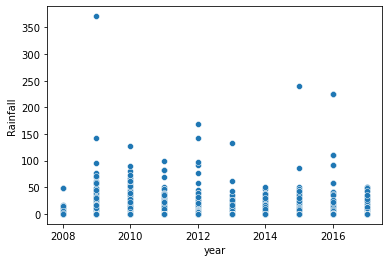

In [142]:
df['Date']=pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
sns.scatterplot(x='year',y=df['Rainfall'],data=df)

observation: Year 2012 is the year of maximum rainfalls.

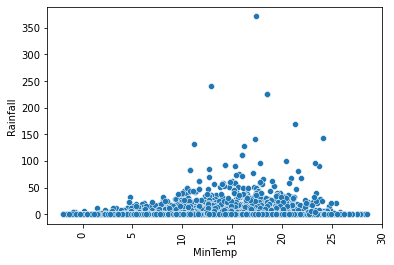

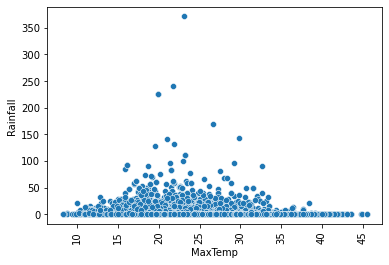

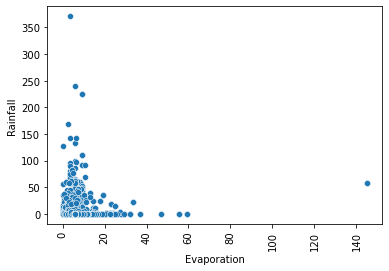

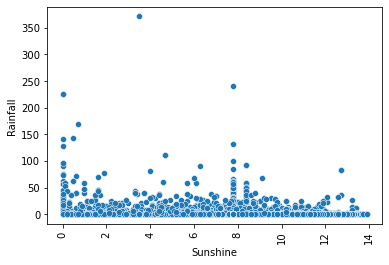

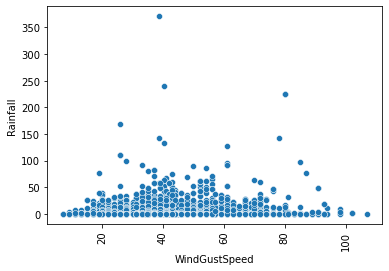

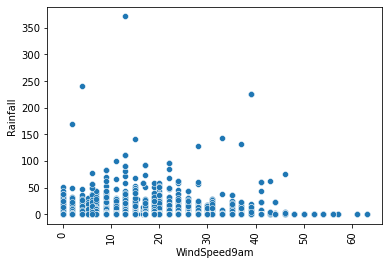

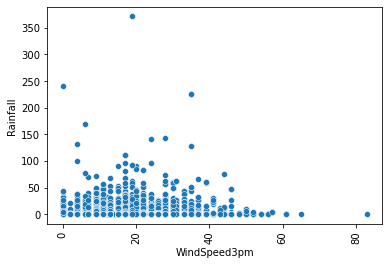

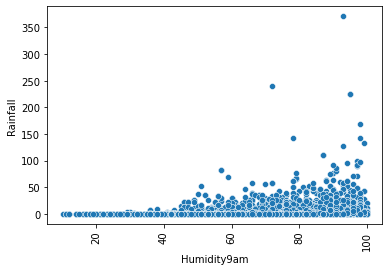

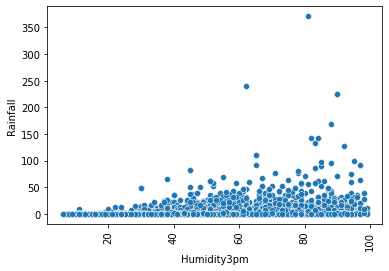

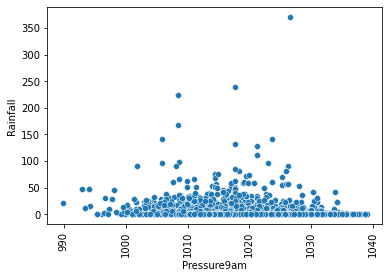

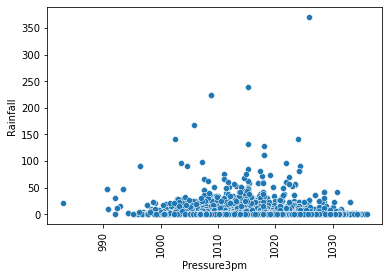

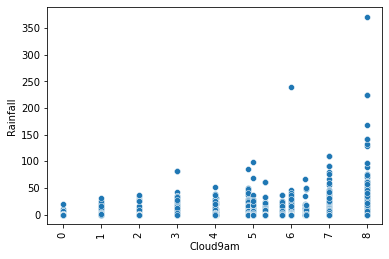

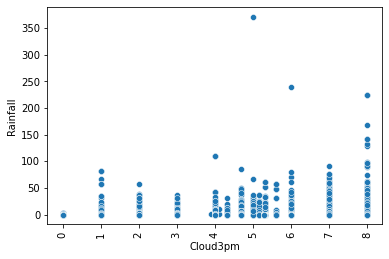

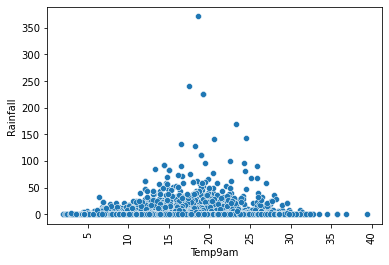

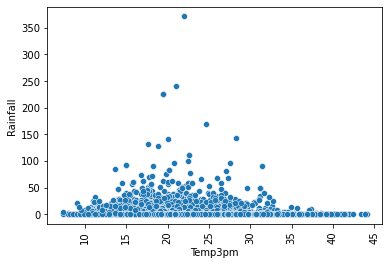

In [15]:
contd=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in contd:
    a=sns.scatterplot(x=df[i],y=df['Rainfall'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

Observation: If minimum temperature is in range 10 to 25 and maximum temperature in range 15 to 28 then heavy rainfall occurs.
    Higher the value of humidity heavy the rainfall will be. Higher the value of clouds heavier the rainfall will be.

## Encoding object data

In [143]:
#We will drop date feature as we have already appended year feature above.
df=df.drop(['Date'],axis=1)

In [144]:
category=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','year','RainTomorrow']
oe=OrdinalEncoder()
for i in category:
    df1=oe.fit_transform(df[[i]])
    df[i]=df1

In [115]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,1.0,13.4,22.9,0.6,5.871464,7.775937,13.0,44.0,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0.0,0.0,0.0
1,1.0,7.4,25.1,0.0,5.871464,7.775937,14.0,44.0,6.0,15.0,...,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0.0,0.0,0.0
2,1.0,12.9,25.7,0.0,5.871464,7.775937,15.0,46.0,13.0,15.0,...,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0.0,0.0,0.0
3,1.0,9.2,28.0,0.0,5.871464,7.775937,4.0,24.0,9.0,0.0,...,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0.0,0.0,0.0
4,1.0,17.5,32.3,1.0,5.871464,7.775937,13.0,41.0,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,0.0


## Describing the data

In [22]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
count,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,...,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000
mean,5.771045,13.153884,23.849846,2.805913,5.865525,7.795367,8.605864,40.054927,7.256078,8.016860,...,51.285367,1017.711213,1015.291975,4.847625,4.665561,17.754564,22.437007,0.243128,0.235064,4.084301
std,3.169089,5.403187,6.104870,10.459379,4.021057,2.823279,5.027594,13.804256,4.588375,4.623769,...,18.353737,6.252479,6.187458,2.524978,2.342263,5.610198,5.936636,0.428998,0.424065,2.472474
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,0.000000
25%,3.000000,9.200000,19.300000,0.000000,4.000000,7.775937,4.000000,31.000000,3.000000,4.000000,...,39.000000,1014.100000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,2.000000
50%,6.000000,13.200000,23.300000,0.000000,5.871464,7.775937,9.000000,40.191038,7.000000,8.000000,...,51.000000,1017.640209,1015.236740,5.776316,5.154047,17.700000,21.900000,0.000000,0.000000,3.000000
75%,8.000000,17.300000,28.000000,1.000000,6.600000,9.000000,13.000000,48.000000,12.000000,12.000000,...,63.000000,1021.400000,1018.900000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,6.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,9.000000


## Correlation between features

In [20]:
df.corr().abs()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Location,1.000000,0.110810,0.054811,0.007789,0.238884,0.094784,0.002380,0.236169,0.031261,0.022518,...,0.056774,0.024714,0.011355,0.029417,0.020783,0.109997,0.051251,0.007156,0.004683,0.480650
MinTemp,0.110810,1.000000,0.717778,0.088402,0.253480,0.051073,0.148292,0.228676,0.044325,0.158168,...,0.081018,0.425163,0.419051,0.055814,0.024065,0.888035,0.685801,0.069719,0.098834,0.032536
MaxTemp,0.054811,0.717778,1.000000,0.088797,0.316659,0.376022,0.212612,0.139388,0.219748,0.188029,...,0.420319,0.321066,0.397416,0.249717,0.252222,0.865440,0.974334,0.228690,0.150462,0.107347
Rainfall,0.007789,0.088402,0.088797,1.000000,0.029205,0.171805,0.056821,0.086682,0.095180,0.040533,...,0.238102,0.074000,0.034241,0.162735,0.141068,0.007177,0.092100,0.463211,0.223636,0.006530
Evaporation,0.238884,0.253480,0.316659,0.029205,1.000000,0.242005,0.029162,0.131221,0.035720,0.049196,...,0.130586,0.164392,0.175220,0.007804,0.068126,0.299188,0.310186,0.078261,0.046832,0.279941
Sunshine,0.094784,0.051073,0.376022,0.171805,0.242005,1.000000,0.086834,0.010275,0.072274,0.068205,...,0.433269,0.021377,0.037156,0.513258,0.545250,0.247860,0.394189,0.241895,0.334536,0.115936
WindGustDir,0.002380,0.148292,0.212612,0.056821,0.029162,0.086834,1.000000,0.011847,0.281633,0.513651,...,0.106550,0.105921,0.030762,0.066530,0.060961,0.170480,0.223201,0.119216,0.043804,0.122950
WindGustSpeed,0.236169,0.228676,0.139388,0.086682,0.131221,0.010275,0.011847,1.000000,0.078230,0.057618,...,0.090077,0.403317,0.370305,0.011608,0.076251,0.202830,0.100481,0.083503,0.190180,0.044098
WindDir9am,0.031261,0.044325,0.219748,0.095180,0.035720,0.072274,0.281633,0.078230,1.000000,0.216230,...,0.128120,0.008943,0.074786,0.102475,0.069479,0.106002,0.227373,0.161732,0.029597,0.020203
WindDir3pm,0.022518,0.158168,0.188029,0.040533,0.049196,0.068205,0.513651,0.057618,0.216230,1.000000,...,0.015358,0.131236,0.043135,0.077552,0.060280,0.178473,0.199758,0.104255,0.013558,0.027772


<AxesSubplot:>

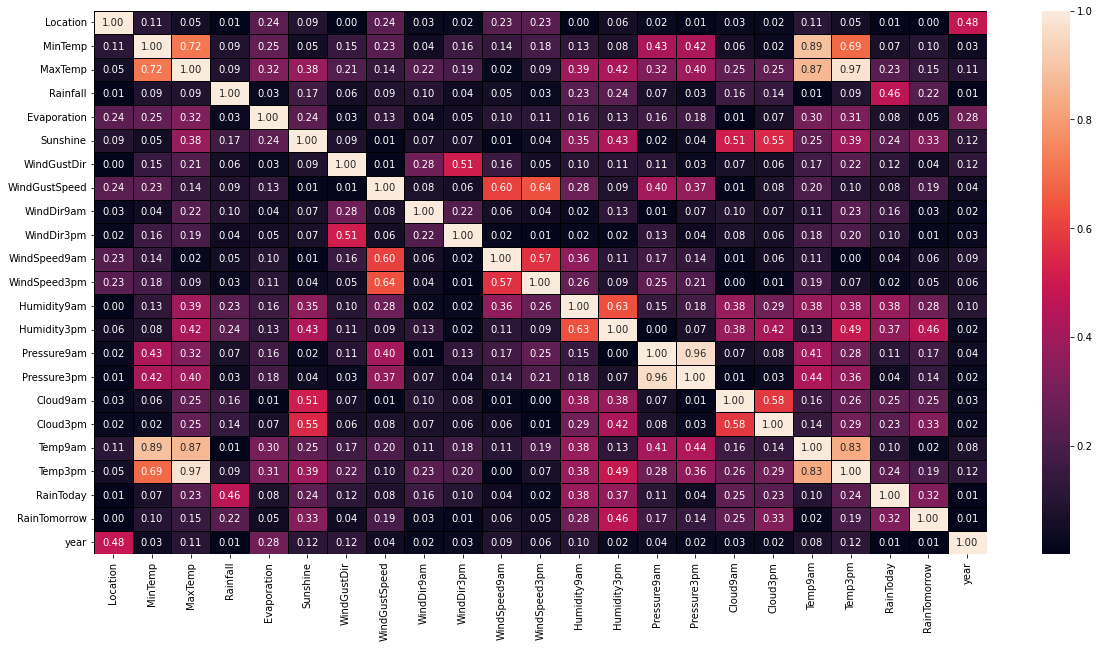

In [21]:
# Plotting heat map for better analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

## VIF

In [23]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features']=df.columns
vif

,vif,features
0,6.772404,Location
1,57.153436,MinTemp
2,424.415632,MaxTemp
3,1.412137,Rainfall
4,4.053684,Evaporation
5,16.255171,Sunshine
6,6.184859,WindGustDir
7,22.400180,WindGustSpeed
8,4.479024,WindDir9am
9,5.929192,WindDir3pm


## Checking outliers

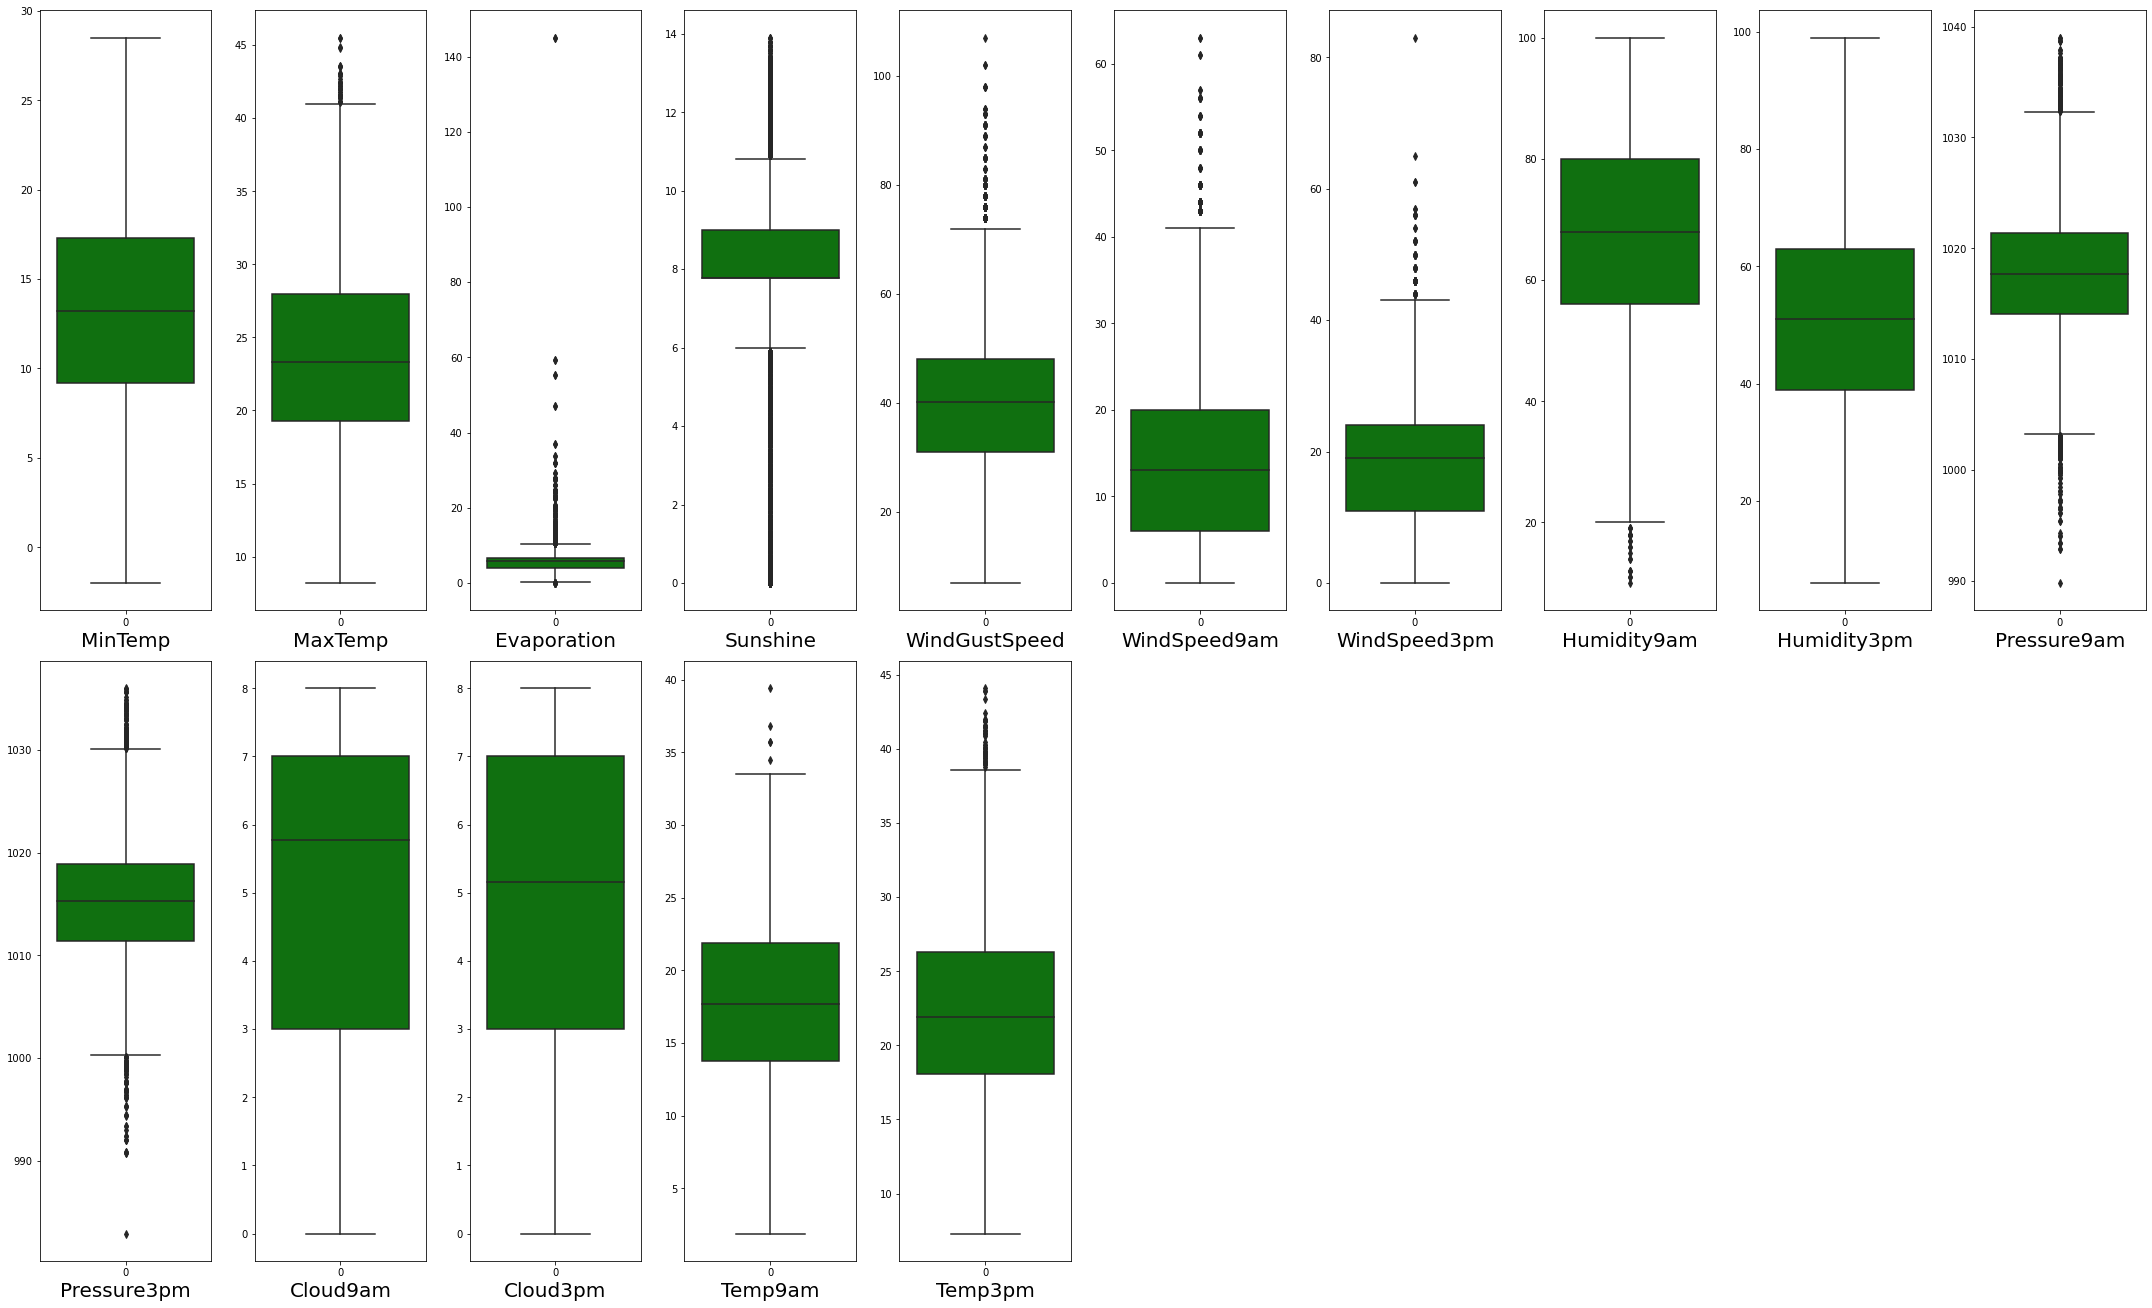

In [24]:
col=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(10,10,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i],fontsize=20)
    plt.tight_layout()

## Checking skewness

In [25]:
df.skew()

Location         -0.048193
MinTemp          -0.077631
MaxTemp           0.383775
Rainfall         13.028837
Evaporation      12.409559
Sunshine         -0.854310
WindGustDir      -0.251170
WindGustSpeed     0.754223
WindDir9am        0.170898
WindDir3pm       -0.103715
WindSpeed9am      0.971653
WindSpeed3pm      0.516887
Humidity9am      -0.255788
Humidity3pm       0.112582
Pressure9am      -0.021049
Pressure3pm      -0.000417
Cloud9am         -0.635449
Cloud3pm         -0.471027
Temp9am          -0.011739
Temp3pm           0.396193
RainToday         1.197839
RainTomorrow      1.249812
year              0.425323
dtype: float64

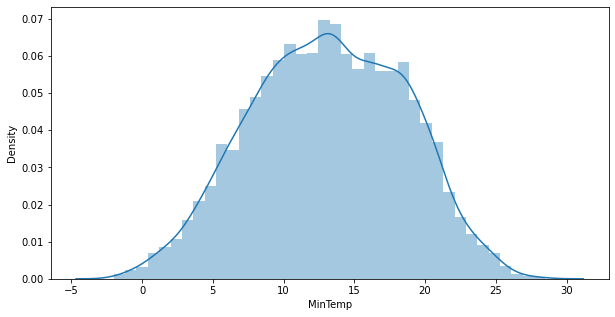

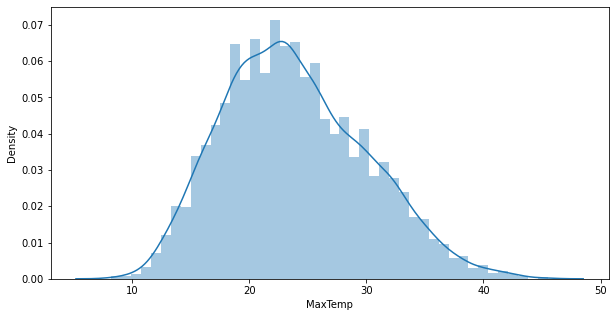

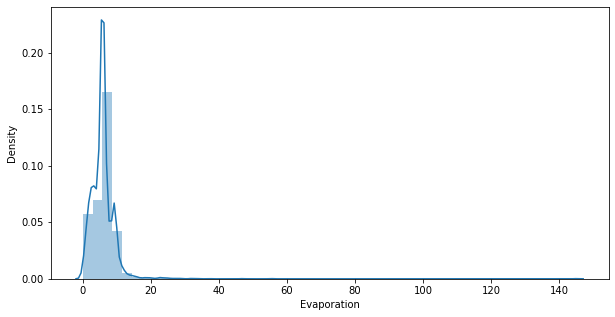

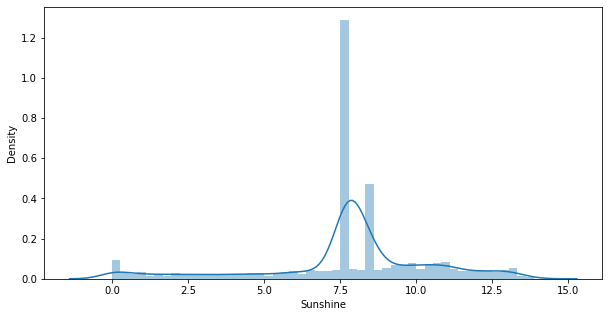

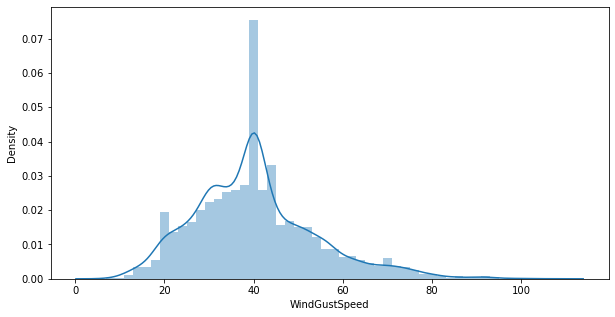

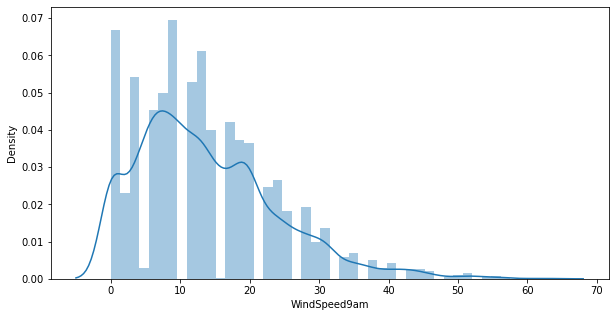

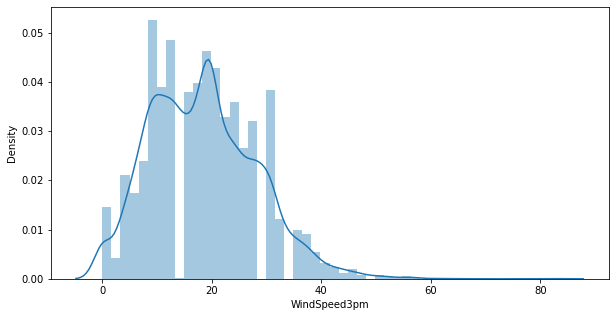

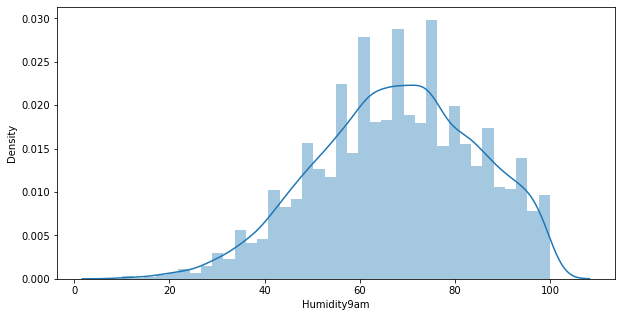

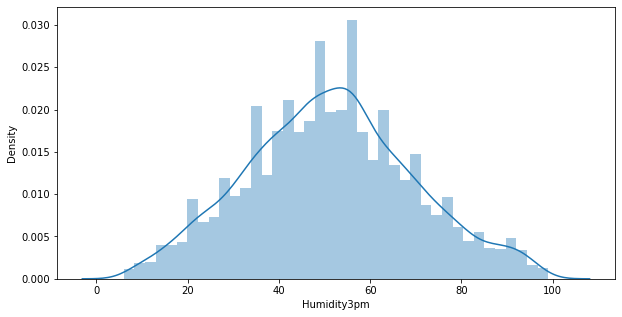

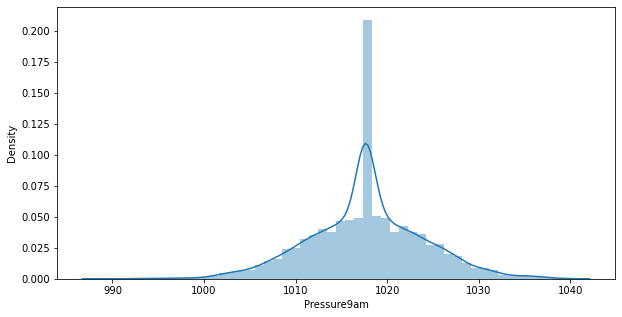

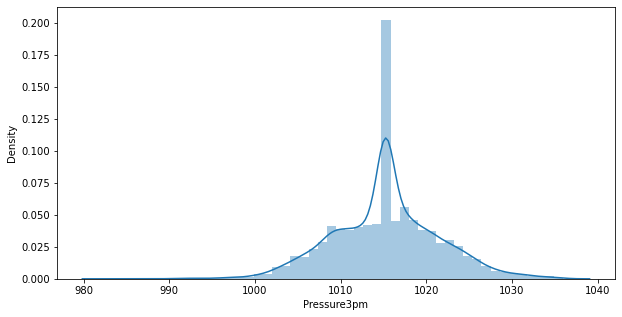

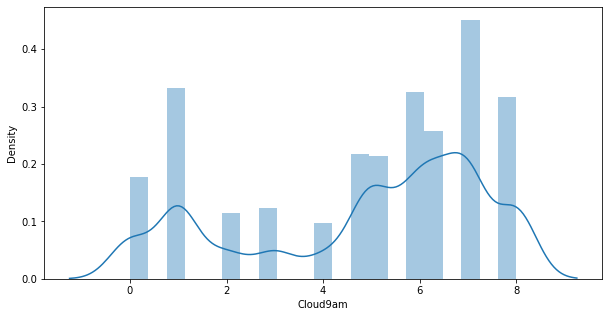

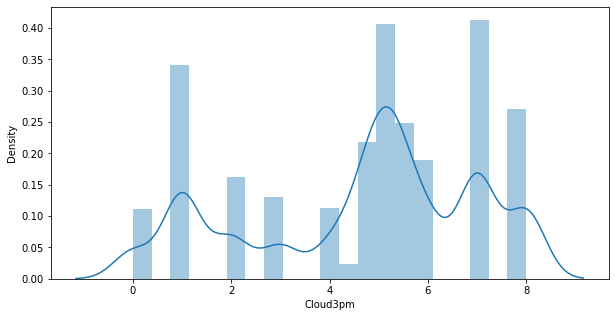

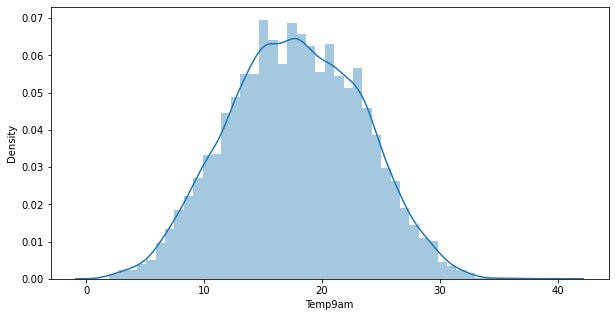

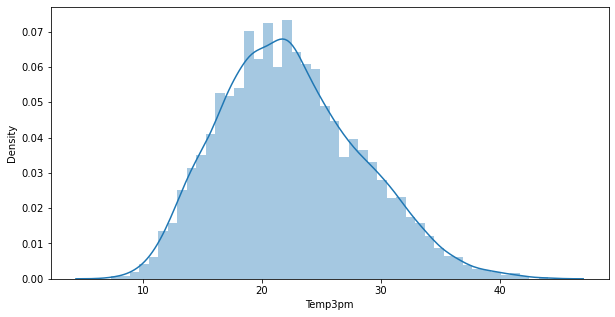

In [26]:
#Getting sure of skewness using distplot
#Plotting dist plot
col=['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
import warnings
warnings.filterwarnings('ignore')
for i in range(len(col)):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col[i]])
    plt.xlabel(col[i],fontsize=10)

Our observation about skewness was correct.

## Treating outliers

In [145]:
#Getting sure of outliers using z score
x=df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Rainfall'],axis=1)
z=np.abs(zscore(x))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {2056, 12, 43, 51, 59, 60, 61, 66, 67, 4191, 4192, 4200, 2164, 4213, 122, 4233, 2195, 2206, 4299, 4344, 4345, 4358, 266, 294, 4416, 4417, 4424, 4455, 4457, 6522, 379, 403, 404, 405, 6550, 4507, 4508, 6557, 6558, 2475, 4527, 2480, 4546, 2501, 4561, 6612, 4567, 6624, 6626, 6627, 6640, 6644, 6646, 6649, 6666, 6667, 4620, 6678, 6685, 6690, 6693, 6694, 555, 560, 561, 4664, 4668, 4669, 6720, 4687, 594, 6738, 4703, 6753, 4722, 4726, 4732, 4743, 4744, 4748, 674, 4775, 4781, 4784, 4807, 4823, 739, 4845, 2798, 4849, 2806, 2815, 4868, 2821, 2825, 6922, 2829, 2835, 2843, 2849, 6946, 6947, 6948, 2857, 2863, 2871, 4919, 2877, 2885, 2891, 2899, 2905, 2913, 2919, 2927, 2933, 2938, 4995, 4996, 2952, 5008, 7063, 5022, 5038, 5039, 7086, 5042, 5049, 3012, 5062, 5063, 5065, 970, 3019, 5068, 3020, 3021, 5072, 5073, 5074, 5075, 3027, 3028, 3029, 3031, 7126, 7131, 5090, 3043, 5096, 3050, 3060, 3062, 5110, 7162, 5116, 5142, 5149, 3102, 5152, 5155, 5156, 3111, 3114, 3118, 5167, 5168, 3125, 7222

In [49]:
#Finding data loss
no_row_dropped=321
loss=(8185-321)/8185
loss=(1-loss)*100
print("data loss-",loss)

data loss- 3.9218081857055553


We could bear with 4% data loss, so lets drop these rows.

In [146]:
#removing rows with outliers
df=df.drop(df.index[i[0]])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,1.0,13.4,22.900000,0.6,5.871464,7.775937,13.0,44.000000,13.0,14.0,...,22.0,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0.0,0.0,0.0
1,1.0,7.4,25.100000,0.0,5.871464,7.775937,14.0,44.000000,6.0,15.0,...,25.0,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0.0,0.0,0.0
2,1.0,12.9,25.700000,0.0,5.871464,7.775937,15.0,46.000000,13.0,15.0,...,30.0,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0.0,0.0,0.0
3,1.0,9.2,28.000000,0.0,5.871464,7.775937,4.0,24.000000,9.0,0.0,...,16.0,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0.0,0.0,0.0
4,1.0,17.5,32.300000,1.0,5.871464,7.775937,13.0,41.000000,1.0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,5.871464,7.775937,0.0,31.000000,9.0,1.0,...,24.0,1024.6,1020.3,6.000000,5.285714,10.1,22.4,0.0,0.0,9.0
8421,9.0,3.6,25.300000,0.0,5.871464,7.775937,6.0,22.000000,9.0,3.0,...,21.0,1023.5,1019.1,6.000000,5.285714,10.9,24.5,0.0,0.0,9.0
8422,9.0,5.4,26.900000,0.0,5.871464,7.775937,3.0,37.000000,9.0,14.0,...,24.0,1021.0,1016.8,6.000000,5.285714,12.5,26.1,0.0,0.0,9.0
8423,9.0,7.8,27.000000,0.0,5.871464,7.775937,9.0,28.000000,10.0,3.0,...,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,9.0


In [147]:
df.skew()

Location         -0.034090
MinTemp          -0.083658
MaxTemp           0.321260
Rainfall         13.697659
Evaporation       0.445462
Sunshine         -0.866810
WindGustDir      -0.263711
WindGustSpeed     0.516038
WindDir9am        0.149361
WindDir3pm       -0.111745
WindSpeed9am      0.728344
WindSpeed3pm      0.326127
Humidity9am      -0.237005
Humidity3pm       0.120508
Pressure9am       0.032528
Pressure3pm       0.064204
Cloud9am         -0.630552
Cloud3pm         -0.464051
Temp9am          -0.037986
Temp3pm           0.335309
RainToday         1.188176
RainTomorrow      1.262843
year              0.436594
dtype: float64

Skewness is still present we need to treat it.

## treating skewness

In [148]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']

In [149]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[-1.55977302,  0.06023343, -0.0713354 , ..., -0.56912716,
        -0.55129819, -2.41319288],
       [-1.55977302, -1.0550753 ,  0.29340033, ..., -0.56912716,
        -0.55129819, -2.41319288],
       [-1.55977302, -0.03226415,  0.38970035, ..., -0.56912716,
        -0.55129819, -2.41319288],
       ...,
       [ 1.02050303, -1.43016897,  0.57854001, ..., -0.56912716,
        -0.55129819,  1.67611271],
       [ 1.02050303, -0.98029808,  0.59405858, ..., -0.56912716,
        -0.55129819,  1.67611271],
       [ 1.02050303,  0.33733002, -0.06462038, ..., -0.56912716,
        -0.55129819,  1.67611271]])

## standardization

In [150]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.55977302,  0.06023343, -0.0713354 , ..., -0.56912716,
        -0.55129819, -2.41319288],
       [-1.55977302, -1.0550753 ,  0.29340033, ..., -0.56912716,
        -0.55129819, -2.41319288],
       [-1.55977302, -0.03226415,  0.38970035, ..., -0.56912716,
        -0.55129819, -2.41319288],
       ...,
       [ 1.02050303, -1.43016897,  0.57854001, ..., -0.56912716,
        -0.55129819,  1.67611271],
       [ 1.02050303, -0.98029808,  0.59405858, ..., -0.56912716,
        -0.55129819,  1.67611271],
       [ 1.02050303,  0.33733002, -0.06462038, ..., -0.56912716,
        -0.55129819,  1.67611271]])

## Treating multicollinearity using PCA

WE would drop high vif score feature to treat multicollinearity but we need to drop many features in that case which is not a good idea and might effect our model performance so better we can use PCA.

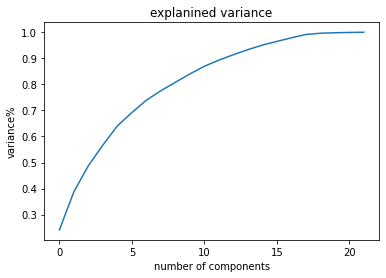

In [151]:
from sklearn.decomposition import PCA
pca=PCA()
p_components=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance%")
plt.title("explanined variance")
plt.show()

Observation: We can see that approx 98% of the variance is explained by 19 components so instead of passing all the 23 components in model lets use only 19.

In [152]:
pca=PCA(n_components=19)
new_data=pca.fit_transform(x)
px=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
px

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,0.478977,1.208263,1.553906,-1.830127,-2.941878,-0.450474,-1.616763,0.778885,0.528747,-0.933071,0.329873,-0.379510,-0.727155,0.765038,0.073129,0.545544,-0.426834,-0.781889,-0.570673
1,0.739880,-0.110913,1.107111,-2.165880,-3.021075,0.551819,-1.844989,-0.391235,0.955714,-0.547983,0.127511,-0.505467,0.175281,0.762514,0.631891,-0.320335,0.610021,0.056822,0.499785
2,1.662652,0.500571,2.156968,-2.263304,-3.095665,-0.925974,-0.982078,0.219503,0.484469,-0.218331,0.392520,-0.191119,-0.331022,0.842983,-0.774075,-0.384825,0.246443,-0.000346,0.229383
3,1.024994,-1.658795,-0.663074,0.903812,-3.144718,-0.462144,-1.570482,1.476836,0.228072,-0.215311,-1.159783,-0.469190,0.812455,1.263768,0.101961,-0.072318,0.017227,-0.609274,0.292579
4,1.447487,1.235471,-1.173254,-0.538558,-2.809734,0.847867,-1.843032,-0.788650,0.790469,-1.153914,0.873916,-0.882207,0.535416,0.252641,0.859612,0.561633,-0.675148,-1.339056,-0.230627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,-0.471527,-2.452112,0.346544,1.767271,1.486446,0.648877,-1.276894,1.528179,-1.005576,0.092295,-2.071813,-0.262916,-0.196379,0.590417,0.296638,0.174948,0.100849,0.271042,0.675980
7860,-0.421774,-2.436282,-0.127460,0.546852,1.569732,0.304988,-1.448020,1.176072,-1.086390,0.086100,-1.937249,-0.226300,0.011072,0.828494,0.237727,-0.224353,-0.394595,-0.549651,0.630130
7861,0.155540,-1.627619,0.351380,-0.514774,1.498427,0.467620,-1.645747,0.238786,-0.652736,-0.146384,-1.795953,0.858421,-1.040409,0.576421,0.683984,0.585436,0.415018,0.491340,0.776693
7862,0.951492,-2.389600,-0.037112,-0.363514,1.334397,0.222112,-0.208521,0.865520,-1.492683,0.599076,-1.516296,-0.202981,0.344791,0.770998,-0.686864,0.074599,0.045157,-0.455325,0.418756


## Train Test Split

In [153]:
from sklearn.linear_model import LinearRegression
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 190

Train Accuracy-  23.1

Test Accuracy-  23.1


At random state: 493

Train Accuracy-  23.1

Test Accuracy-  23.1


 Best accuracy at random state- 190


## Linear Regression

In [61]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=190,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
lr_train_acc=round(r2_score(y_train,pred_train)*100,1)
lr_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",lr_train_acc)
print("\nTest Accuracy- ",lr_test_acc)


Train Accuracy-  23.1

Test Accuracy-  23.1


## Cross Validation Score

In [62]:
for i in range(2,20):
    cv_score=cross_val_score(lr,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",lr_test_acc)



At cv- 2

 cross validation score is- 8.420933811351455

 Accuracy score is- 23.1


At cv- 3

 cross validation score is- 23.936061413951734

 Accuracy score is- 23.1


At cv- 4

 cross validation score is- 22.153469904046812

 Accuracy score is- 23.1


At cv- 5

 cross validation score is- 24.43819900089123

 Accuracy score is- 23.1


At cv- 6

 cross validation score is- 24.643065782239212

 Accuracy score is- 23.1


At cv- 7

 cross validation score is- 23.427880954687367

 Accuracy score is- 23.1


At cv- 8

 cross validation score is- 25.64051577931211

 Accuracy score is- 23.1


At cv- 9

 cross validation score is- 25.24325629491566

 Accuracy score is- 23.1


At cv- 10

 cross validation score is- 25.569036698103574

 Accuracy score is- 23.1


At cv- 11

 cross validation score is- 25.76883193800655

 Accuracy score is- 23.1


At cv- 12

 cross validation score is- 25.862029020282197

 Accuracy score is- 23.1


At cv- 13

 cross validation score is- 25.456884947759345

 Accur

Best validation score is at cv=4

In [63]:
cv_score_best_lr=cross_val_score(lr,px,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_lr)
print("accuracy score for linear regression model is-",lr_test_acc)

cross validation score is- 22.153469904046812
accuracy score for linear regression model is- 23.1


## Calculating RMSE,MAE,MSE Errors

In [66]:
lr_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
lr_mae=mean_absolute_error(y_test, pred_test)
lr_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 10.122718112843629
MAE:: 3.2682489794117613
MSE:: 102.46942199209246


## Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  89.5

Test Accuracy-  61.8


At random state: 1

Train Accuracy-  91.8

Test Accuracy-  34.8


At random state: 2

Train Accuracy-  90.7

Test Accuracy-  52.3


At random state: 3

Train Accuracy-  89.7

Test Accuracy-  49.6


At random state: 4

Train Accuracy-  91.9

Test Accuracy-  36.5


At random state: 5

Train Accuracy-  92.1

Test Accuracy-  42.7


At random state: 6

Train Accuracy-  91.0

Test Accuracy-  37.4


At random state: 7

Train Accuracy-  92.1

Test Accuracy-  24.0


At random state: 8

Train Accuracy-  90.3

Test Accuracy-  58.1


At random state: 9

Train Accuracy-  91.1

Test Accuracy-  33.6


At random state: 10

Train Accuracy-  90.8

Test Accuracy-  40.1


At random state: 11

Train Accuracy-  93.4

Test Accuracy-  21.6


At random state: 12

Train Accuracy-  91.3

Test Accuracy-  34.8


At random state: 13

Train Accuracy-  92.4

Test Accuracy-  27.1


At random state: 14

Train Accuracy-  90.9

Test Accuracy-  63.1


At 

In [154]:
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=14,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(r2_score(y_train,pred_train)*100,1)
rf_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  91.4

Test Accuracy-  64.0


## Cross Validation Score

In [72]:
for i in range(4,23):
    cv_score=cross_val_score(rf,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_test_acc)



At cv- 4

 cross validation score is- 27.096432025256824

 Accuracy score is- 62.1


At cv- 5

 cross validation score is- 39.00996638681089

 Accuracy score is- 62.1


At cv- 6

 cross validation score is- 37.442540590858435

 Accuracy score is- 62.1


At cv- 7

 cross validation score is- 34.064173659338124

 Accuracy score is- 62.1


At cv- 8

 cross validation score is- 45.767718834798444

 Accuracy score is- 62.1


At cv- 9

 cross validation score is- 45.29378383325243

 Accuracy score is- 62.1


At cv- 10

 cross validation score is- 47.66508525852845

 Accuracy score is- 62.1


At cv- 11

 cross validation score is- 48.889639658842796

 Accuracy score is- 62.1


At cv- 12

 cross validation score is- 44.45688592375074

 Accuracy score is- 62.1


At cv- 13

 cross validation score is- 35.88146541152717

 Accuracy score is- 62.1


At cv- 14

 cross validation score is- 40.93008735420211

 Accuracy score is- 62.1


At cv- 15

 cross validation score is- 46.28019149209993

 Accur

Best cross validation score is at cv=11.

In [73]:
cv_score_best_rf=cross_val_score(rf,px,y,cv=11).mean()*100
print("cross validation score is-",cv_score_best_rf)
print("accuracy score for random forest regression model is-",rf_test_acc)

cross validation score is- 49.17928287679704
accuracy score for random forest regression model is- 62.1


## Calculating RMSE,MAE,MSE Errors

In [74]:
rf_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
rf_mae=mean_absolute_error(y_test, pred_test)
rf_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 5.21428550564628
MAE:: 1.7619027336300064
MSE:: 27.18877333439288


## Support Vector Regression

In [75]:
from sklearn import svm
sm=svm.SVR()
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=26,test_size=0.20)
sm.fit(x_train,y_train)
sm_pred_train=sm.predict(x_train)
sm_pred_test=sm.predict(x_test)
sm_acc_train=r2_score(y_train,sm_pred_train)
sm_acc_test=r2_score(y_test,sm_pred_test)
print("acc train",sm_acc_train*100)
print("acc test",sm_acc_test*100)

acc train 20.47212538128629
acc test 14.085482588271347


## Cross Validation Score

In [76]:
for i in range(4,15):
    cv_score=cross_val_score(sm,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",sm_acc_test*100)



At cv- 4

 cross validation score is- 19.025564755889267

 Accuracy score is- 14.085482588271347


At cv- 5

 cross validation score is- 18.5738340851557

 Accuracy score is- 14.085482588271347


At cv- 6

 cross validation score is- 19.62719187824061

 Accuracy score is- 14.085482588271347


At cv- 7

 cross validation score is- 19.48684906320361

 Accuracy score is- 14.085482588271347


At cv- 8

 cross validation score is- 21.23405811057576

 Accuracy score is- 14.085482588271347


At cv- 9

 cross validation score is- 22.271476678248302

 Accuracy score is- 14.085482588271347


At cv- 10

 cross validation score is- 22.14511439752292

 Accuracy score is- 14.085482588271347


At cv- 11

 cross validation score is- 22.801791884888264

 Accuracy score is- 14.085482588271347


At cv- 12

 cross validation score is- 22.756675773322335

 Accuracy score is- 14.085482588271347


At cv- 13

 cross validation score is- 23.722110806571514

 Accuracy score is- 14.085482588271347


At cv- 14


So we are getting the least difference between cross_val_score and accuracy score at cv=4

In [77]:
cv_score_best_sm=cross_val_score(sm,px,y,cv=4).mean()*100
print("cross validation score is-",cv_score_best_sm)
print("accuracy score for support vector regressor model is-",sm_acc_test*100)

cross validation score is- 19.025564755889267
accuracy score for support vector regressor model is- 14.085482588271347


## Calculating RMSE,MAE,MSE Errors

In [78]:
sm_rmse=np.sqrt(mean_squared_error(y_test, sm_pred_test))
sm_mae=mean_absolute_error(y_test, sm_pred_test)
sm_mse=mean_squared_error(y_test,sm_pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, sm_pred_test)))
print("MAE::",mean_absolute_error(y_test, sm_pred_test))
print("MSE::",mean_squared_error(y_test,sm_pred_test))

RMSE:: 10.601487588444805
MAE:: 1.9003166610972106
MSE:: 112.39153908794923


## Knn Regressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=46,test_size=0.20)
knn.fit(x_train,y_train)
knn_pred_train=knn.predict(x_train)
knn_pred_test=knn.predict(x_test)
knn_acc_train=r2_score(y_train,knn_pred_train)
knn_acc_test=r2_score(y_test,knn_pred_test)
print("acc train",knn_acc_train*100)
print("acc test",knn_acc_test*100)

acc train 45.7491462604133
acc test 35.20138977913748


## Cross Validation Score

In [93]:
for i in range(4,15):
    cv_score=cross_val_score(knn,px,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_acc_test*100)



At cv- 4

 cross validation score is- 21.098580005875213

 Accuracy score is- 35.20138977913748


At cv- 5

 cross validation score is- 29.99599817366435

 Accuracy score is- 35.20138977913748


At cv- 6

 cross validation score is- 29.19253500278682

 Accuracy score is- 35.20138977913748


At cv- 7

 cross validation score is- 27.360579363540133

 Accuracy score is- 35.20138977913748


At cv- 8

 cross validation score is- 31.30270415582214

 Accuracy score is- 35.20138977913748


At cv- 9

 cross validation score is- 34.00015779411705

 Accuracy score is- 35.20138977913748


At cv- 10

 cross validation score is- 34.78645362435674

 Accuracy score is- 35.20138977913748


At cv- 11

 cross validation score is- 34.0907124350811

 Accuracy score is- 35.20138977913748


At cv- 12

 cross validation score is- 33.19850116738569

 Accuracy score is- 35.20138977913748


At cv- 13

 cross validation score is- 28.767096890689064

 Accuracy score is- 35.20138977913748


At cv- 14

 cross vali

So we are getting the least difference between cross_val_score and accuracy score at cv=9

In [94]:
cv_score_best_knn=cross_val_score(knn,px,y,cv=9).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for K Nearest classifier model is-",knn_acc_test*100)

cross validation score is- 34.00015779411705
accuracy score for K Nearest classifier model is- 35.20138977913748


## Calculating RMSE,MAE,MSE Errors

In [95]:
knn_rmse=np.sqrt(mean_squared_error(y_test, knn_pred_test))
knn_mae=mean_absolute_error(y_test, knn_pred_test)
knn_mse=mean_squared_error(y_test,knn_pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, knn_pred_test)))
print("MAE::",mean_absolute_error(y_test, knn_pred_test))
print("MSE::",mean_squared_error(y_test,knn_pred_test))

RMSE:: 6.208929893785055
MAE:: 1.9895486331849968
MSE:: 38.5508104259377


## XGBoost Regressor

In [101]:
from xgboost import XGBRegressor
xgmod=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(px,y,random_state=100,test_size=0.20)
xgmod.fit(x_train,y_train)
pred_train=xgmod.predict(x_train)
pred_test=xgmod.predict(x_test)
xg_train_acc=round(r2_score(y_train,pred_train)*100,1)
xg_test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",xg_train_acc)
print("\nTest Accuracy- ",xg_test_acc)


Train Accuracy-  98.8

Test Accuracy-  39.6


## Cross Validation Score

In [102]:
cv_score_best_xg=cross_val_score(xgmod,px,y,cv=20).mean()*100
print("cross validation score is-",cv_score_best_xg)
print("accuracy score for Knn classifier model is-",xg_test_acc)

cross validation score is- 31.572277220589978
accuracy score for Knn classifier model is- 39.6


## Calculating RMSE,MAE,MSE Errors

In [103]:
xgb_rmse=np.sqrt(mean_squared_error(y_test, pred_test))
xgb_mae=mean_absolute_error(y_test, pred_test)
xgb_mse=mean_squared_error(y_test,pred_test)
print("RMSE::",np.sqrt(mean_squared_error(y_test, pred_test)))
print("MAE::",mean_absolute_error(y_test, pred_test))
print("MSE::",mean_squared_error(y_test,pred_test))

RMSE:: 6.493839000515645
MAE:: 2.2387081421229063
MSE:: 42.169944964618026


## Model summary

In [105]:
models=['Linear Regression','Random Forest Regressor','Support Vector Regressor','Knn Regressor','XGBoost']
test_acc=[lr_test_acc,rf_test_acc,sm_acc_test*100,knn_acc_test*100,xg_test_acc]
cv_score=[cv_score_best_lr,cv_score_best_rf,cv_score_best_sm,cv_score_best_knn,cv_score_best_xg]
rmse=[lr_rmse,rf_rmse,sm_rmse,knn_rmse,xgb_rmse]
mae=[lr_mae,rf_mae,sm_mae,knn_mae,xgb_mae]
mse=[lr_mse,rf_mse,sm_mse,knn_mse,xgb_mse]
dfm=pd.DataFrame(list(zip(models,test_acc,cv_score,rmse,mae,mse)),columns=['Models','Test Accuracy','CV Score','RMSE','MAE','MSE'])
dfm

,Models,Test Accuracy,CV Score,RMSE,MAE,MSE
0,Linear Regression,23.100000,22.153470,10.122718,3.268249,102.469422
1,Random Forest Regressor,62.100000,49.179283,5.214286,1.761903,27.188773
2,Support Vector Regressor,14.085483,19.025565,10.601488,1.900317,112.391539
3,Knn Regressor,35.201390,34.000158,6.208930,1.989549,38.550810
4,XGBoost,39.600000,31.572277,6.493839,2.238708,42.169945


Observation: Looking at the above formed dataframe we could see that the best performing model is random forest regressor as it has highest test accuracy and it has least rmse, mae and mse errors. So we will finalise random forest regressor and lets perform hyperparameter tuning on it to improve its performance.

## Hyperparameter tuning on Random Forest Regressor

In [155]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
    "bootstrap": [True, False],
    "min_samples_split": [2, 6, 10]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


RandomForestRegressor(bootstrap=False, max_depth=50, max_features=6,
                      min_samples_split=10)

In [156]:
rf1=RandomForestRegressor(n_estimators=300,max_depth=50,max_features=6,bootstrap=False,min_samples_split=10)
rf1.fit(x_train,y_train)
pred_train=rf1.predict(x_train)
pred_test=rf1.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  90.8

Test Accuracy-  65.0


Our accuracy is increased by 3% so we will save this model.

## Model saving

In [157]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf1, open(filename, 'wb'))